In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plant = "O"
xls_files = {}


xls = pd.ExcelFile(
    f"../../../data/raw/204/EMBRAPII hubIC IACC CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  O ['INSTRUÇÕES', '132', '81', 'FIBRO']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('O', '132', array(['', 'CPIIF40'], dtype=object)),
 ('O', '81', array(['', 'CPIIF32'], dtype=object)),
 ('O', 'FIBRO', array(['', 'Fibro'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'': 3})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1336 non-null   object        
 1   (Data, Produção)                             1336 non-null   datetime64[ns]
 2   (Horário, Produção)                          0 non-null      float64       
 3   (Data, Medida)                               0 non-null      float64       
 4   (Horário, Medida)                            0 non-null      float64       
 5   (Tipo de cimento, Unnamed: 6_level_2)        1336 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  0 non-null      float64       
 7   (Obs., Unnamed: 8_level_2)                   0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 90.1+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 78.9 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                1329 non-null   float64
 1   MgO                1330 non-null   float64
 2   Na2O               0 non-null      float64
 3   Al2O3              1330 non-null   float64
 4   SiO2               1330 non-null   float64
 5   SO3                1330 non-null   float64
 6   K2O                1330 non-null   float64
 7   TiO2               0 non-null      float64
 8   Fe2O3              1330 non-null   float64
 9   Perda ao fogo      1330 non-null   float64
 10  Resíduo insolúvel  0 non-null      float64
 11  Obs.               1330 non-null   float64
dtypes: float64(12)
memory usage: 135.1 KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1336 non-null   float64
 1   (Unnamed: 137_level_1, #200)              1336 non-null   float64
 2   (Unnamed: 138_level_1, #325)              1336 non-null   float64
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(6)
memory usage: 67.6 KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1336 non-null   float64
 1   (Tempo de pega, Fim)              1336 non-null   float64
 2   (Resistência à compressão, 1 d)   810 non-null    float64
 3   (Resistência à compressão, 3 d)   1336 non-null   float64
 4   (Resistência à compressão, 7 d)   1336 non-null   float64
 5   (Resistência à compressão, 28 d)  1323 non-null   float64
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(7)
memory usage: 78.9 KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1440 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1336 non-null   object 
 2   (Data, Produção)                                              1336 non-null   object 
 3   (Horário, Produção)                                           0 non-null      object 
 4   (Data, Medida)                                                0 non-null      object 
 5   (Horário, Medida)                                             0 non-null      object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1336 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   0 non-n

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("Fibro", "Fibrocimento")


df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(1336, 26)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant         City       Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  \
0     O  Cajati - SP 2020-01-02  54.67  3.65   NaN   4.24  13.95  3.64  0.19   
1     O  Cajati - SP 2020-01-05  56.15  3.63   NaN   3.90  14.10  3.55  0.14   
2     O  Cajati - SP 2020-01-06  56.70  3.66   NaN   3.87  14.21  3.47  0.12   
3     O  Cajati - SP 2020-01-07  56.07  3.57   NaN   3.83  14.01  3.42  0.13   
4     O  Cajati - SP 2020-01-08  55.92  3.82   NaN   3.76  14.16  3.56  0.17   

   ...  #325  #400  Specific Gravity  Final setting time  \
0  ...  0.26   NaN               NaN               250.0   
1  ...  0.35   NaN               NaN               210.0   
2  ...  0.35   NaN               NaN               220.0   
3  ...  0.39   NaN               NaN               250.0   
4  ...  0.33   NaN               NaN               260.0   

   Initial setting time   CS1   CS3   CS7  CS28  Cement_Type  
0                 300.0   9.2  28.3  40.4  52.6     CPII F40  
1                 250.0  10.5  33.2  42.0  52.9     CPII F40  
2                 270.0  12.6  35.1  43.8  51.7     CPII F40  
3                 300.0  10.8  29.4  41.8  53.9     CPII F40  
4                 300.0  10.9  28.2  40.4  54.9     CPII F40  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant         City       Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3  \
1331     O  Cajati - SP 2023-06-20  54.09  7.68   NaN   4.26  16.15  3.27   
1332     O  Cajati - SP 2023-06-22  54.08  7.63   NaN   4.38  16.72  3.31   
1333     O  Cajati - SP 2023-06-24  54.47  7.79   NaN   4.26  16.89  2.87   
1334     O  Cajati - SP 2023-06-27  54.36  7.25   NaN   3.94  16.67  3.17   
1335     O  Cajati - SP 2023-06-29  54.62  7.15   NaN   3.72  16.74  3.13   

       K2O  ...  #325  #400  Specific Gravity  Final setting time  \
1331  0.23  ...  2.79   NaN               NaN               140.0   
1332  0.23  ...  3.04   NaN               NaN               140.0   
1333  0.27  ...  2.28   NaN               NaN               140.0   
1334  0.24  ...  1.78   NaN               NaN               140.0   
1335  0.24  ...  2.33   NaN               NaN               150.0   

      Initial setting time   CS1   CS3   CS7  CS28   Cement_Type  
1331                 205.0  14.8  28.1  37.0  52.5  Fibrocimento  
1332                 205.0  15.0  27.9  37.2   0.0  Fibrocimento  
1333                 215.0  14.3  28.4  39.7  53.3  Fibrocimento  
1334                 215.0  13.2  28.2  38.3  53.8  Fibrocimento  
1335                 210.0  14.1  28.4  38.2  53.1  Fibrocimento  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 1336 non-null   object        
 1   City                  1336 non-null   object        
 2   Date                  1336 non-null   datetime64[ns]
 3   CaO                   1329 non-null   float64       
 4   MgO                   1330 non-null   float64       
 5   Na2O                  0 non-null      float64       
 6   Al2O3                 1330 non-null   float64       
 7   SiO2                  1330 non-null   float64       
 8   SO3                   1330 non-null   float64       
 9   K2O                   1330 non-null   float64       
 10  TiO2                  0 non-null      float64       
 11  Fe2O3                 1330 non-null   float64       
 12  Loss on Ignition      1330 non-null   float64       
 13  Insoluble Residue 

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           22
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                    1336  2021-10-26 01:41:19.041916160   
CaO                   1329.0                      55.188126   
MgO                   1330.0                       5.354218   
Na2O                     0.0                            NaN   
Al2O3                 1330.0                       3.543617   
SiO2                  1330.0                       13.95512   
SO3                   1330.0                       3.345023   
K2O                   1330.0                       0.190113   
TiO2                     0.0                            NaN   
Fe2O3                 1330.0                       3.892083   
Loss on Ignition      1330.0                       8.371286   
Insoluble Residue        0.0                            NaN   
Blaine                1336.0                    4610.426647   
#200                  1336.0                       0.108211   
#325                  1336.0                       2.435771   
#400                     0.0                            NaN   
Specific Gravity         0.0                            NaN   
Final setting time    1336.0                     230.708832   
Initial setting time  1336.0                     295.501497   
CS1                    810.0                      11.125062   
CS3                   1336.0                      22.143563   
CS7                   1336.0                      31.433308   
CS28                  1323.0                      44.438987   

                                      min                  25%  \
Date                  2020-01-02 00:00:00  2020-12-02 18:00:00   
CaO                                 34.91                54.42   
MgO                                  2.88                 4.91   
Na2O                                  NaN                  NaN   
Al2O3                                1.97                 3.15   
SiO2                                 2.73               13.045   
SO3                                  1.97                 3.18   
K2O                                   0.1                 0.16   
TiO2                                  NaN                  NaN   
Fe2O3                                2.89                 3.63   
Loss on Ignition                      0.0                  6.7   
Insoluble Residue                     NaN                  NaN   
Blaine                                0.0               4317.5   
#200                                  0.0                 0.03   
#325                                  0.0                 0.42   
#400                                  NaN                  NaN   
Specific Gravity                      NaN                  NaN   
Final setting time                  140.0                205.0   
Initial setting time                190.0                270.0   
CS1                                   8.0                 10.0   
CS3                                  11.4                 15.9   
CS7                                  21.1                 24.9   
CS28                                  0.0                 37.8   

                                      50%                  75%  \
Date                  2021-10-19 12:00:00  2022-09-24 00:00:00   
CaO                                  55.3                 56.0   
MgO                                  5.51                 5.87   
Na2O                                  NaN                  NaN   
Al2O3                                3.47                 3.71   
SiO2                                13.99                14.73   
SO3                                  3.34                 3.52   
K2O                                  0.19                 0.21   
TiO2                                  NaN                  NaN   
Fe2O3                                3.89                 4.15   
Loss on Ignition                      7.5                 10.9   
Insoluble Residue                     NaN                  NaN   
Blaine                             4710.0               4910.0   
#

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique          top  freq                           mean  \
Plant        1336      1            O  1336                            NaN   
City         1336      1  Cajati - SP  1336                            NaN   
Date         1336    NaN          NaN   NaN  2021-10-26 01:41:19.041916160   
Cement_Type  1336      3     CPII F40   762                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2020-01-02 00:00:00  2020-12-02 18:00:00  2021-10-19 12:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
City                         NaN                  NaN  
Date         2022-09-24 00:00:00  2023-06-29 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['O'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CPII F40', 'CPII F32', 'Fibrocimento'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Cajati - SP'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
O    1336
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CPII F40        762
CPII F32        526
Fibrocimento     48
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Cajati - SP    1336
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1332993/3223151730.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


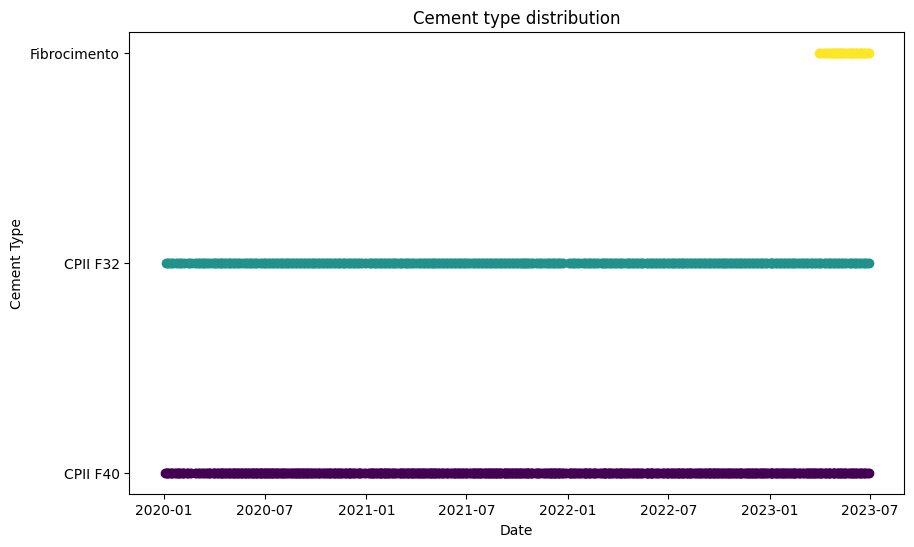

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

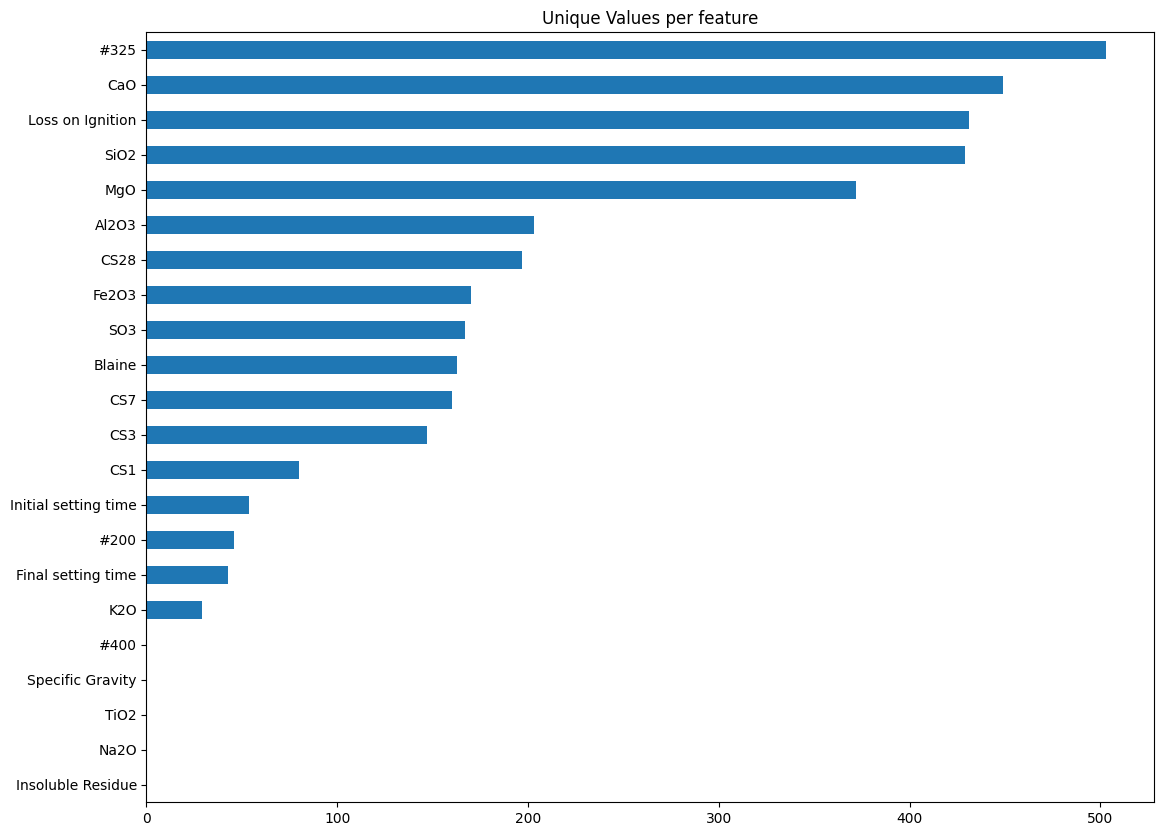

<IPython.core.display.Javascript object>

In [39]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

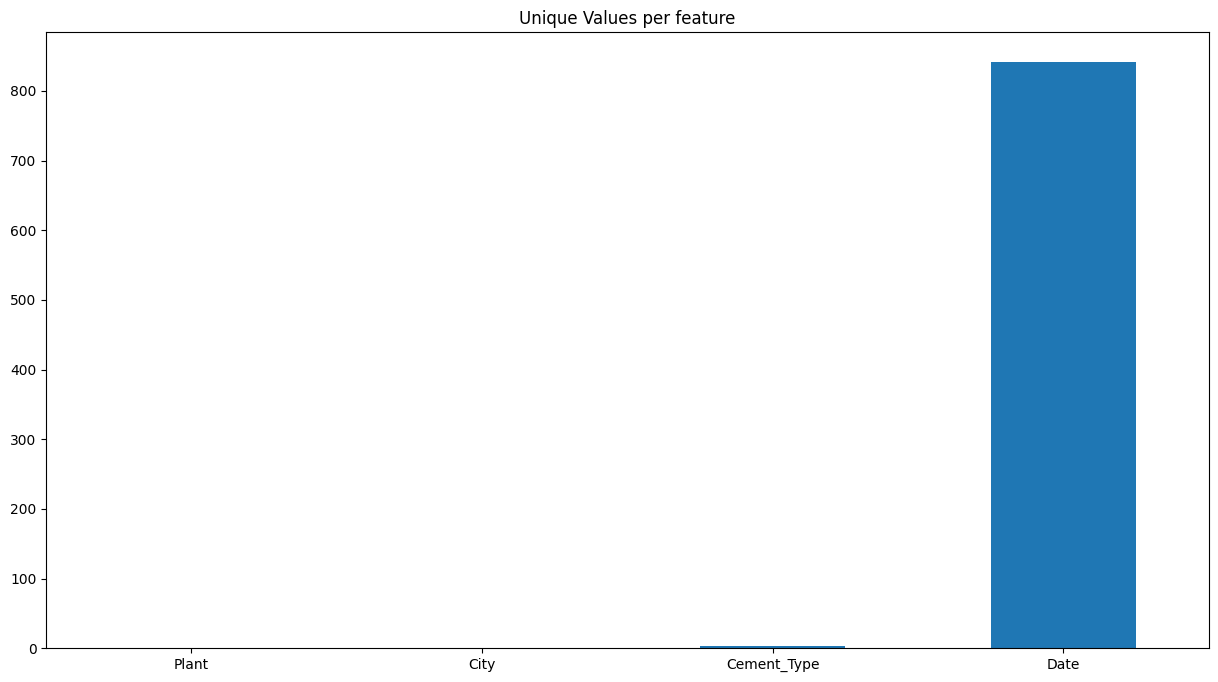

<IPython.core.display.Javascript object>

In [40]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

In [41]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

<IPython.core.display.Javascript object>

<h3>2.2. Missing values</h3>

In [42]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 15 variables with missing values from a total of 26


<IPython.core.display.Javascript object>

In [43]:
df.isna().any()

Plant                   False
City                    False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                  False
#200                    False
#325                    False
#400                     True
Specific Gravity         True
Final setting time      False
Initial setting time    False
CS1                      True
CS3                     False
CS7                     False
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [44]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [45]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 26 artists>

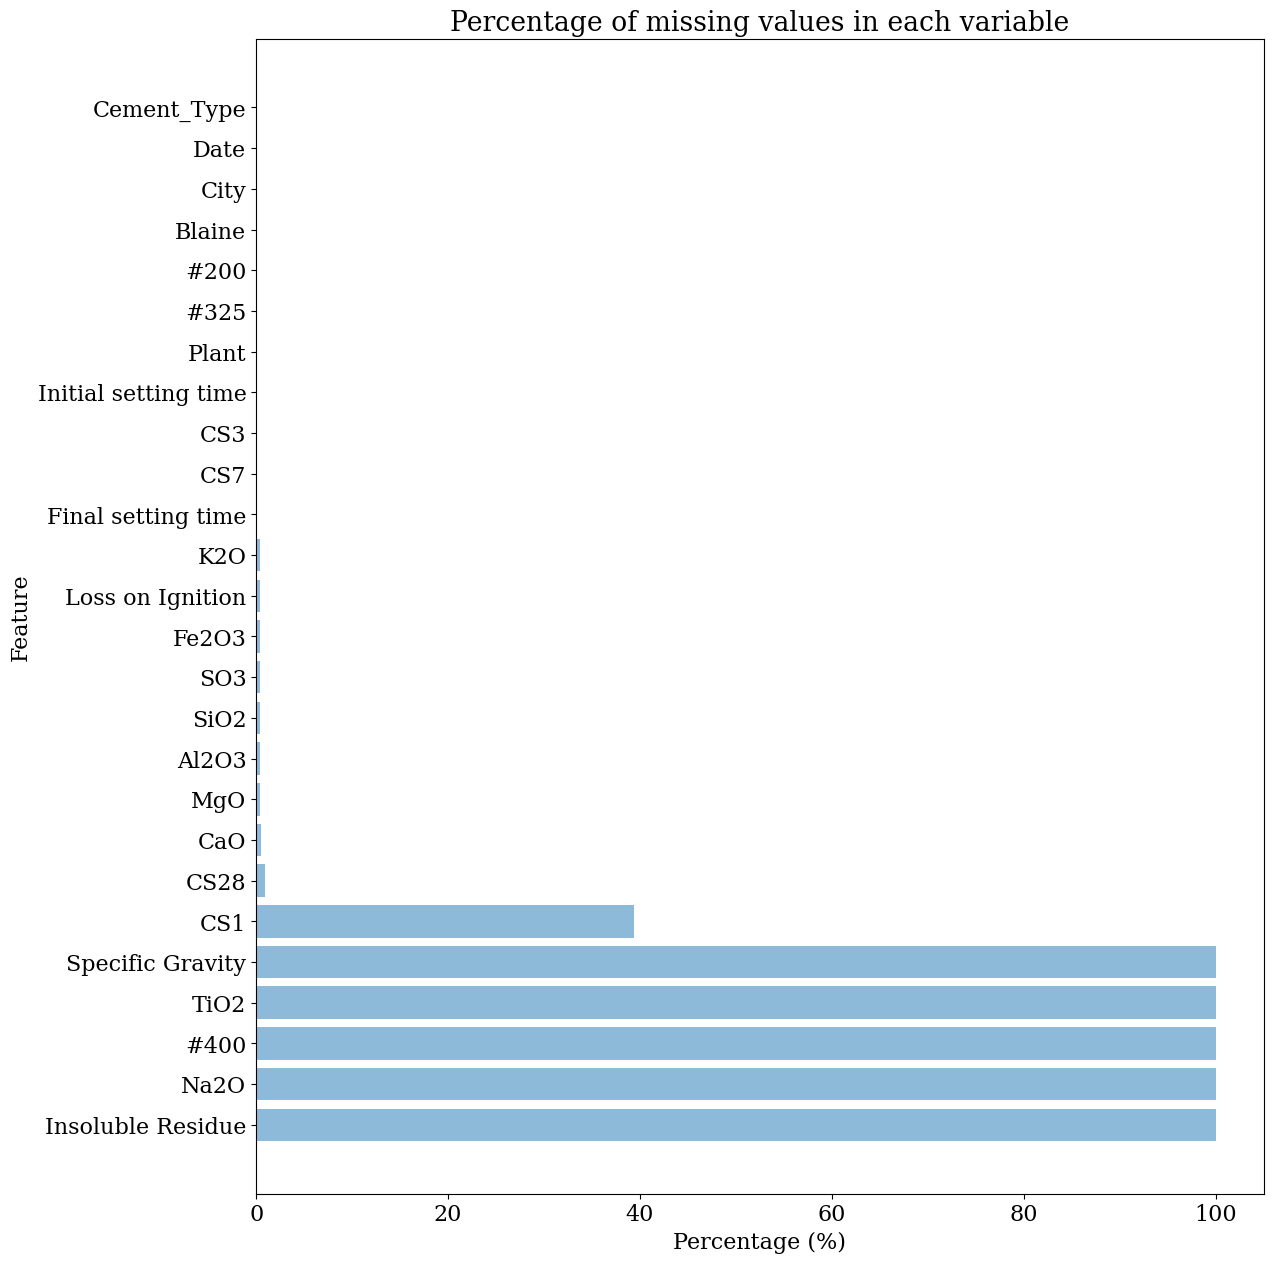

<IPython.core.display.Javascript object>

In [46]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [47]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [48]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

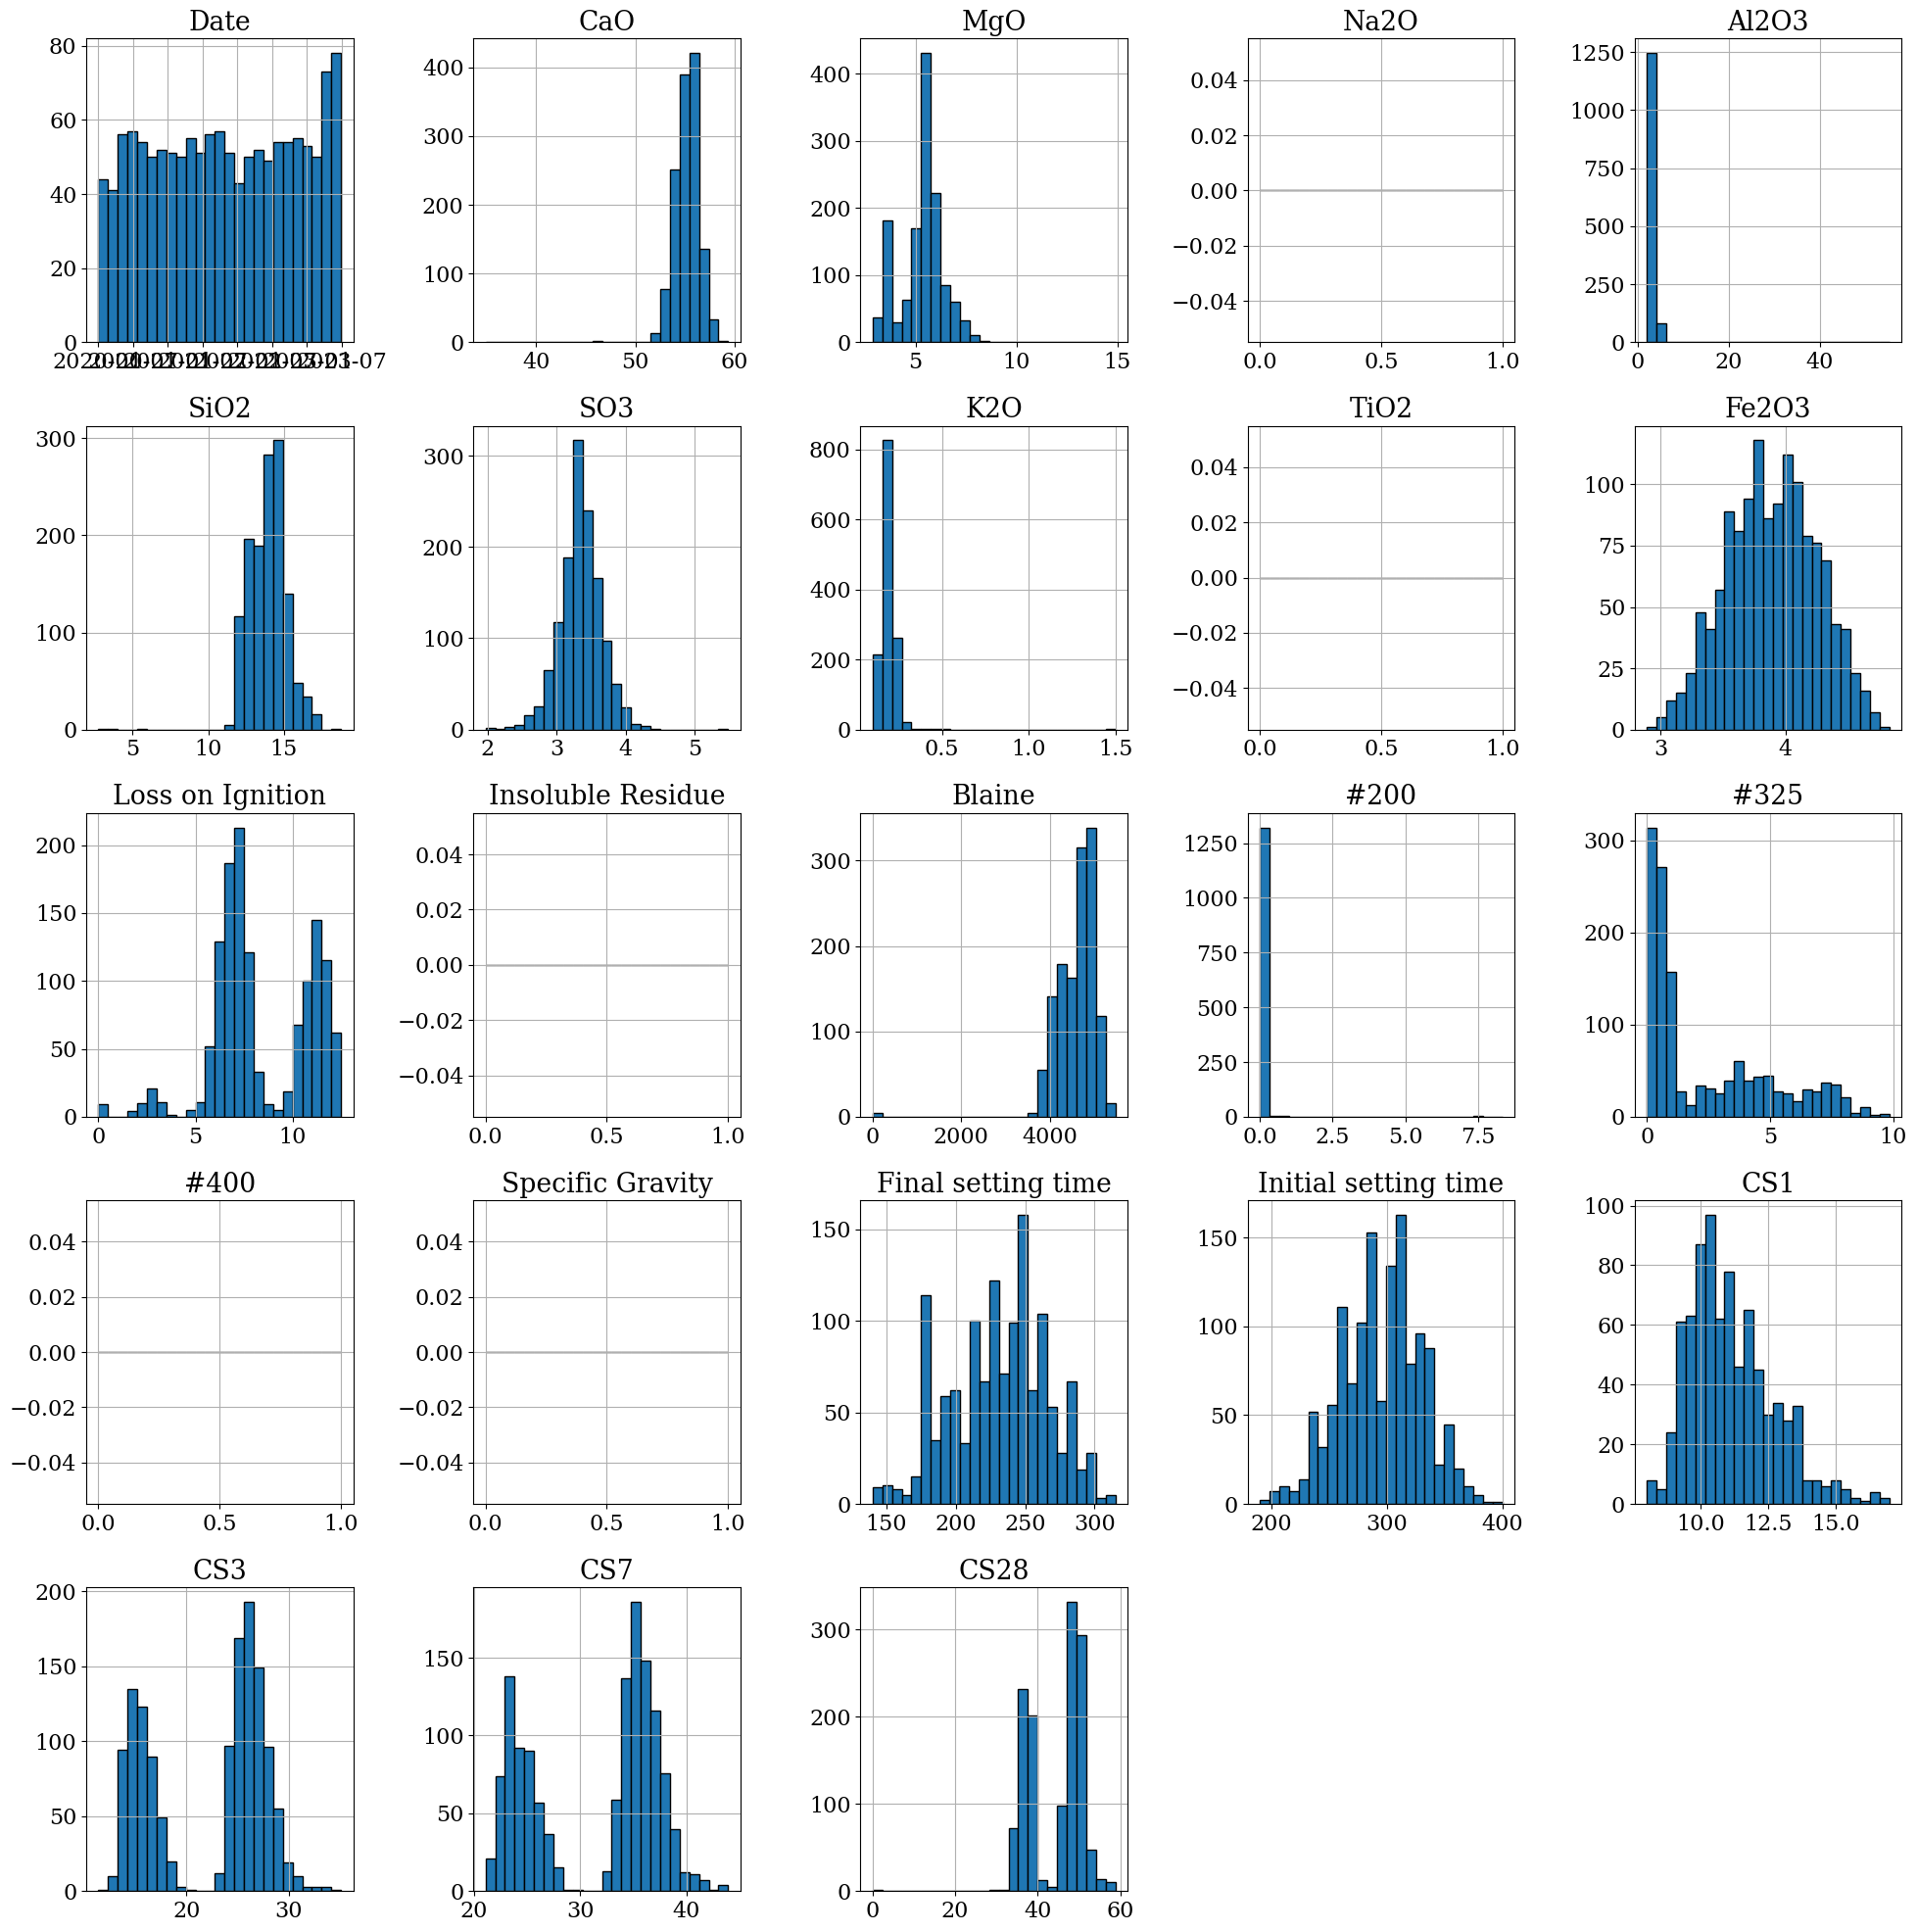

<IPython.core.display.Javascript object>

In [49]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

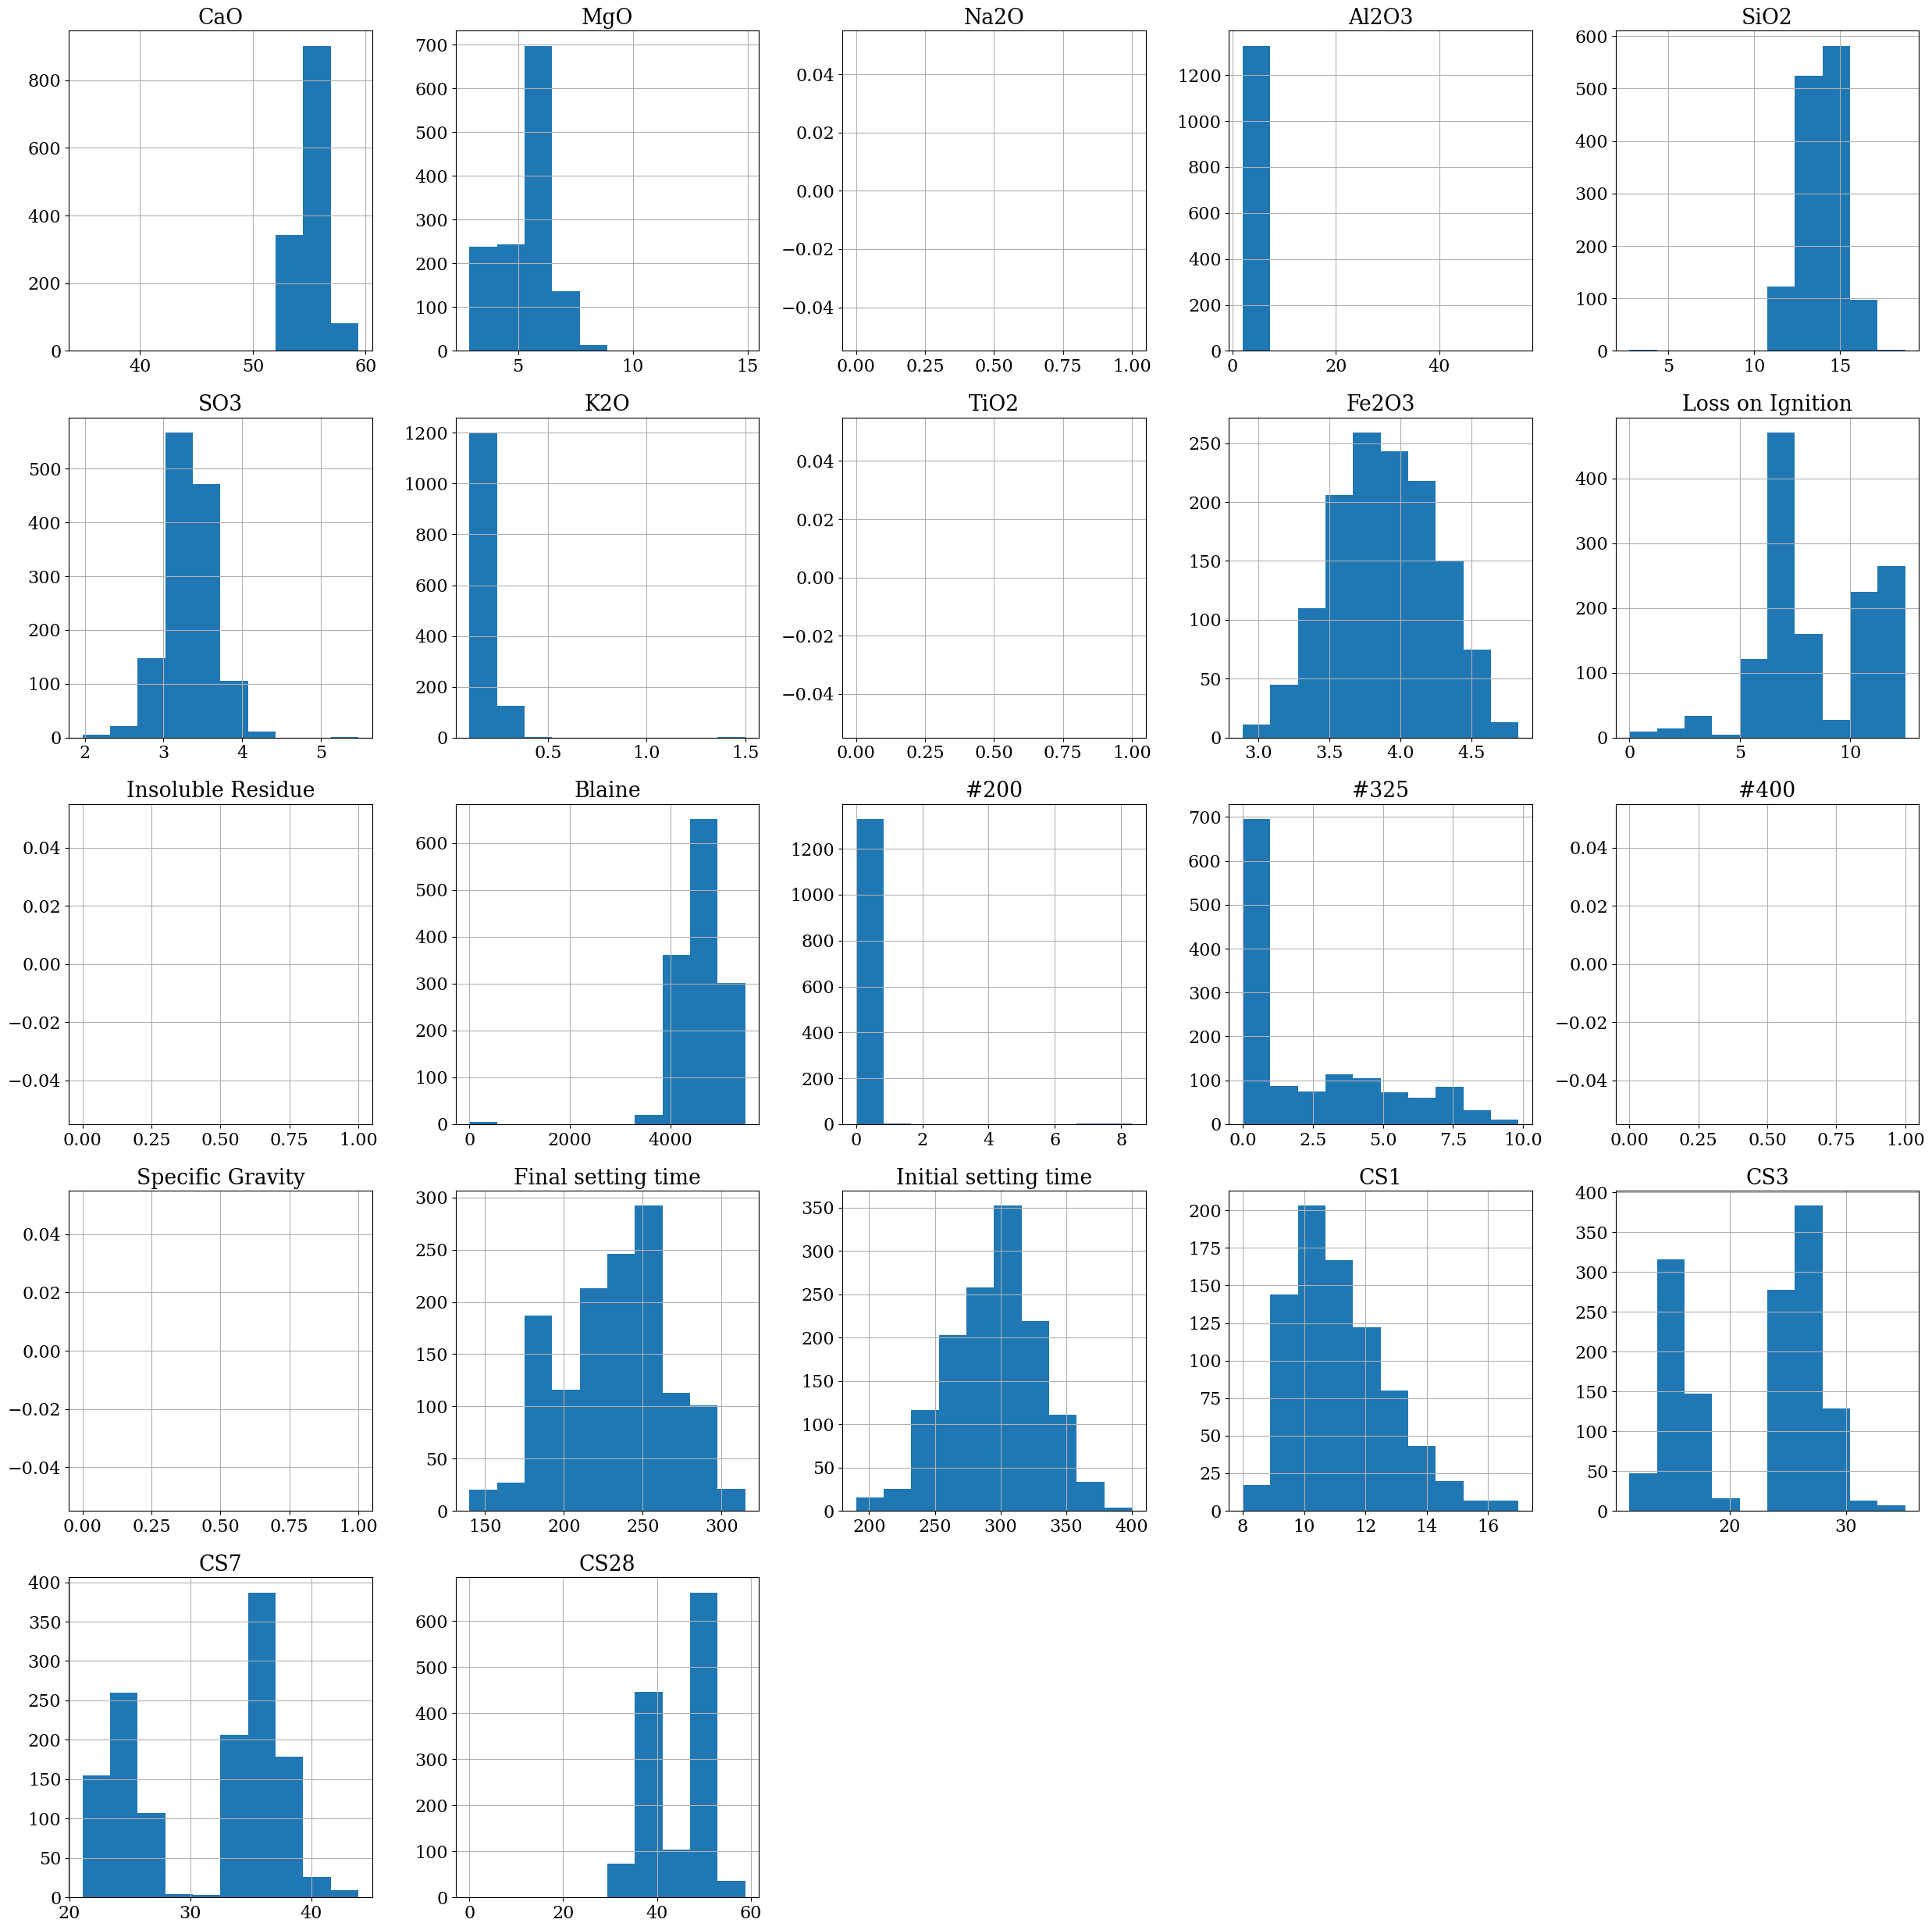

<IPython.core.display.Javascript object>

In [50]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

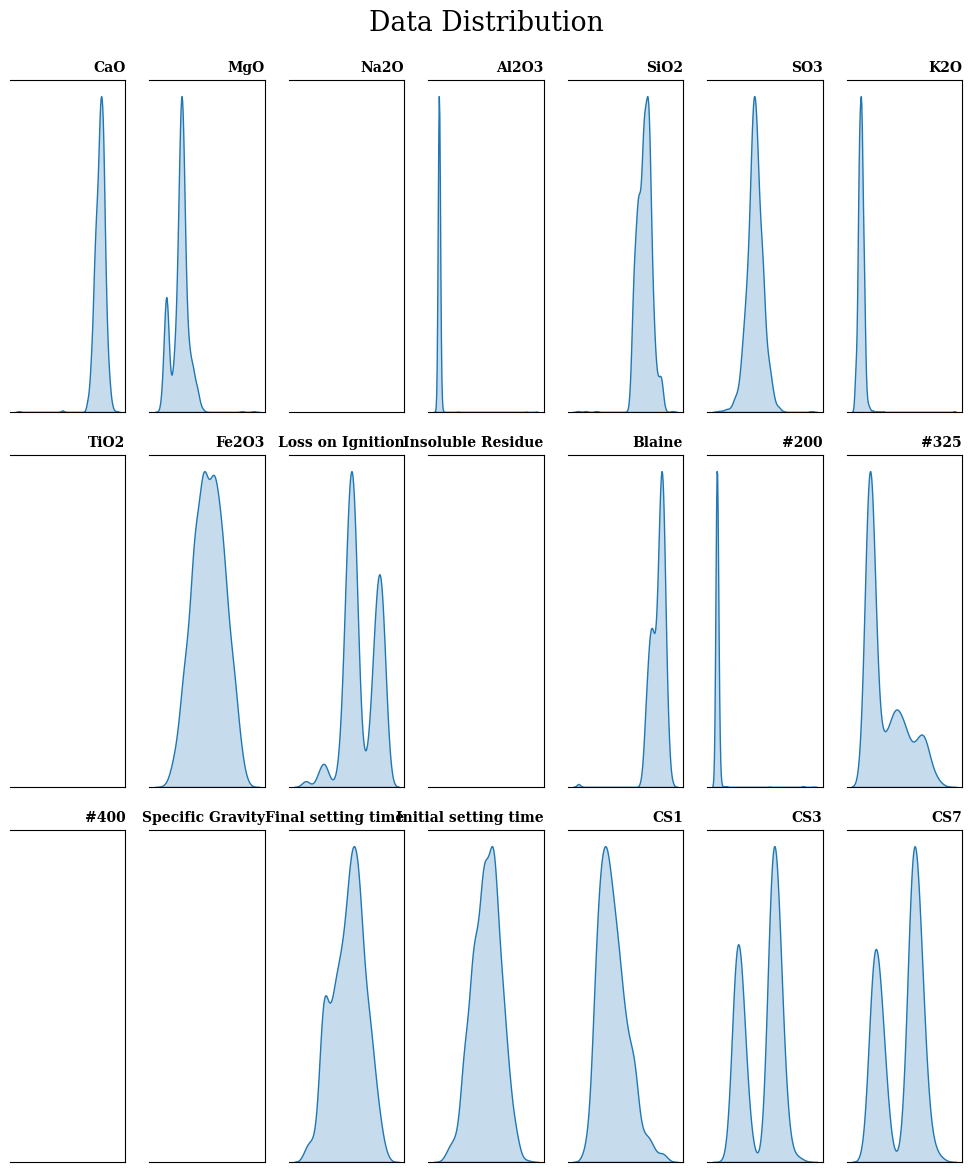

<IPython.core.display.Javascript object>

In [51]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

In [52]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<IPython.core.display.Javascript object>

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

In [53]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

<IPython.core.display.Javascript object>

In [54]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                 CS7                     0.978093
Final setting time  Initial setting time    0.944168
CS7                 CS28                    0.937411
CS3                 CS28                    0.930320
Loss on Ignition    CS3                     0.864588
                    CS7                     0.863325
                    CS28                    0.841447
#325                CS3                     0.826097
                    CS7                     0.812889
                    CS28                    0.788566
SiO2                Loss on Ignition        0.735516
Loss on Ignition    #325                    0.717724
dtype: float64

<IPython.core.display.Javascript object>

In [55]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.937411
CS3                   CS28    0.930320
Loss on Ignition      CS28    0.841447
#325                  CS28    0.788566
SiO2                  CS28    0.631146
Initial setting time  CS28    0.540875
Final setting time    CS28    0.528617
Blaine                CS28    0.473594
CS1                   CS28    0.287637
SO3                   CS28    0.259614
MgO                   CS28    0.177029
Fe2O3                 CS28    0.153187
Al2O3                 CS28    0.123938
K2O                   CS28    0.109299
#200                  CS28    0.107748
CaO                   CS28    0.043941
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

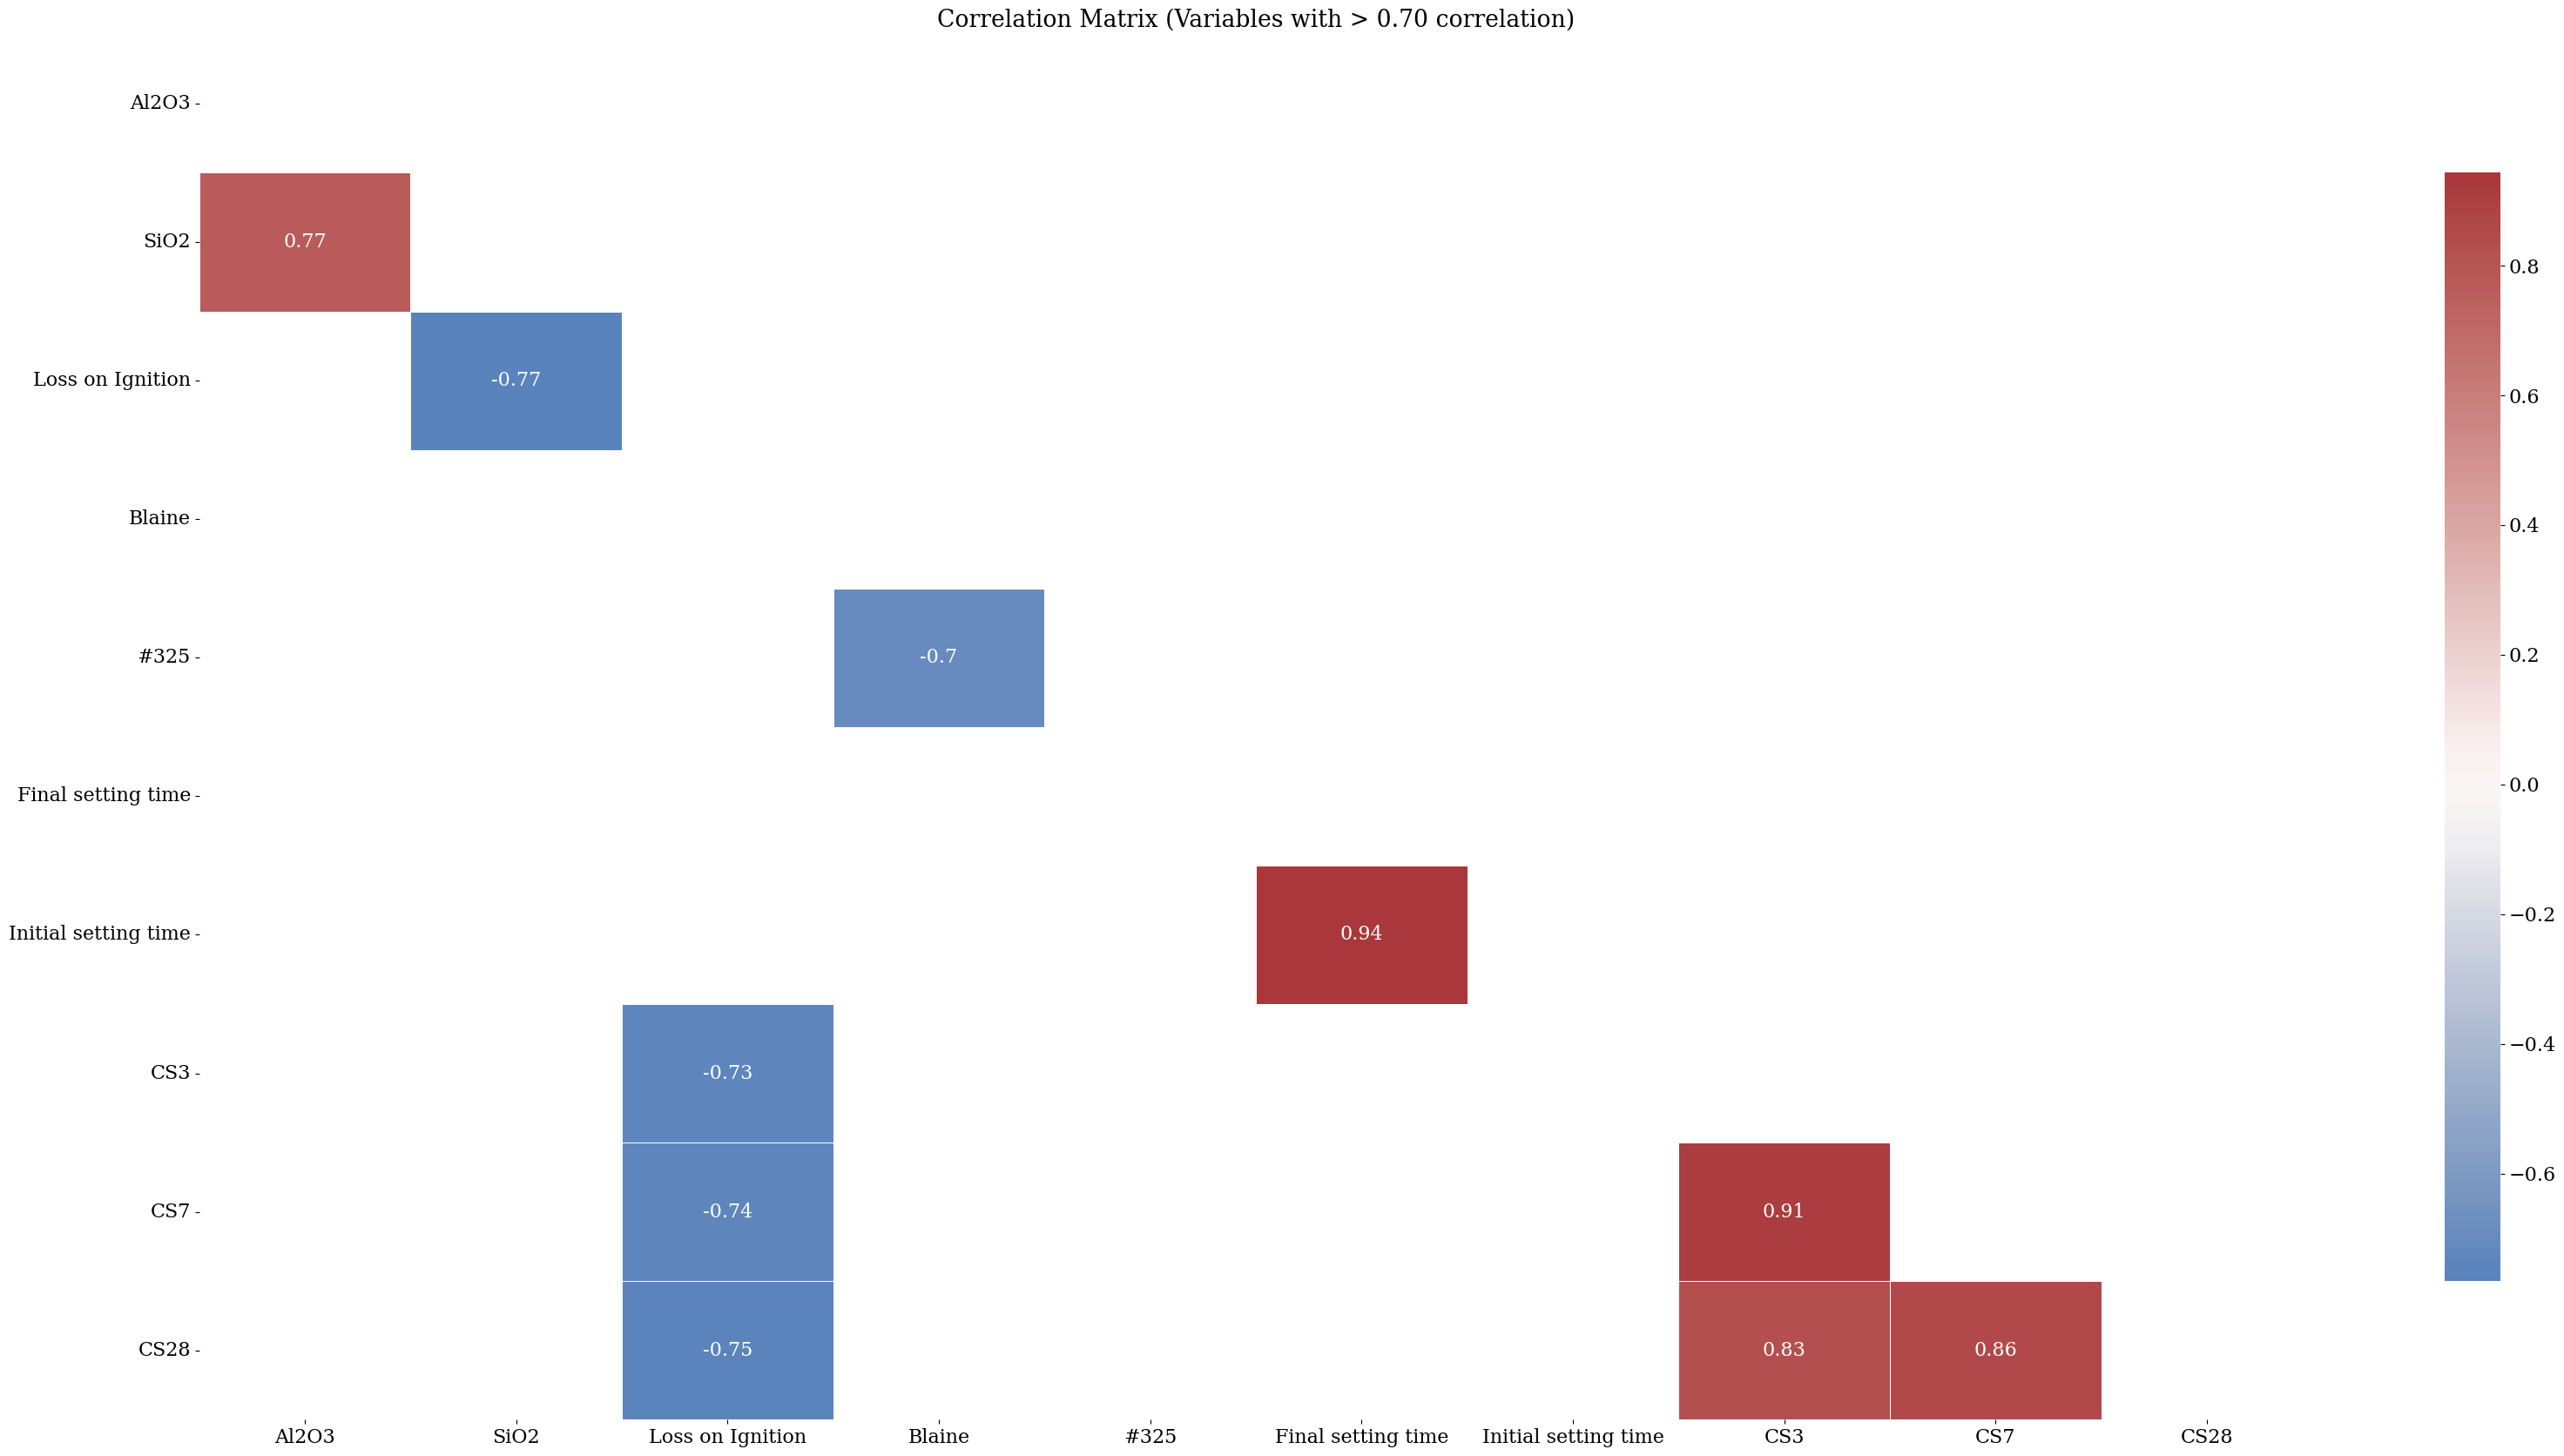

<IPython.core.display.Javascript object>

In [56]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [57]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.943079
CS3                 CS7                     0.912072
CS7                 CS28                    0.855671
CS3                 CS28                    0.825983
Al2O3               SiO2                    0.765828
SiO2                Loss on Ignition        0.765459
Loss on Ignition    CS28                    0.753749
                    CS7                     0.737931
                    CS3                     0.732428
Blaine              #325                    0.701030
dtype: float64

<IPython.core.display.Javascript object>

In [58]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.855671
CS3                   CS28    0.825983
Loss on Ignition      CS28    0.753749
#325                  CS28    0.657324
SiO2                  CS28    0.638898
Al2O3                 CS28    0.582162
Initial setting time  CS28    0.530508
Blaine                CS28    0.513934
Final setting time    CS28    0.509463
CS1                   CS28    0.262561
#200                  CS28    0.234106
MgO                   CS28    0.233299
SO3                   CS28    0.226721
K2O                   CS28    0.153300
Fe2O3                 CS28    0.120791
CaO                   CS28    0.030991
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

In [59]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

<IPython.core.display.Javascript object>

In [60]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.835271
CS3                 CS7                     0.749319
dtype: float64

<IPython.core.display.Javascript object>

In [61]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.668297
CS3                   CS28    0.627016
Loss on Ignition      CS28    0.534592
SiO2                  CS28    0.438593
#325                  CS28    0.430837
Al2O3                 CS28    0.403040
Initial setting time  CS28    0.378993
Final setting time    CS28    0.362829
Blaine                CS28    0.361084
CS1                   CS28    0.184259
#200                  CS28    0.159928
MgO                   CS28    0.159355
SO3                   CS28    0.149617
K2O                   CS28    0.106005
Fe2O3                 CS28    0.080990
CaO                   CS28    0.020573
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

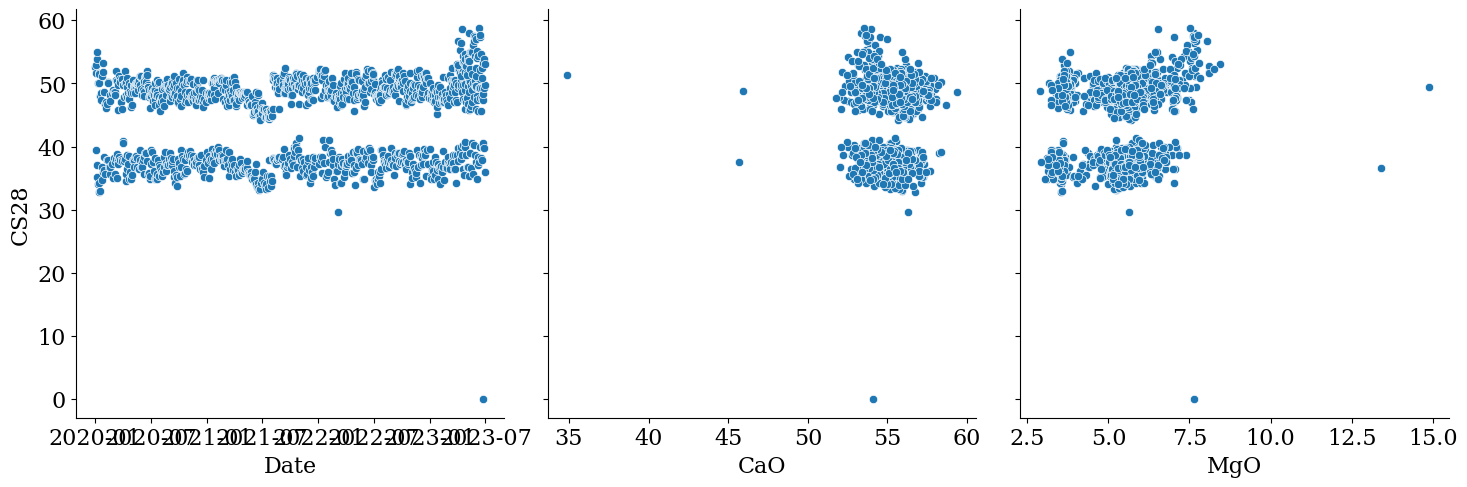

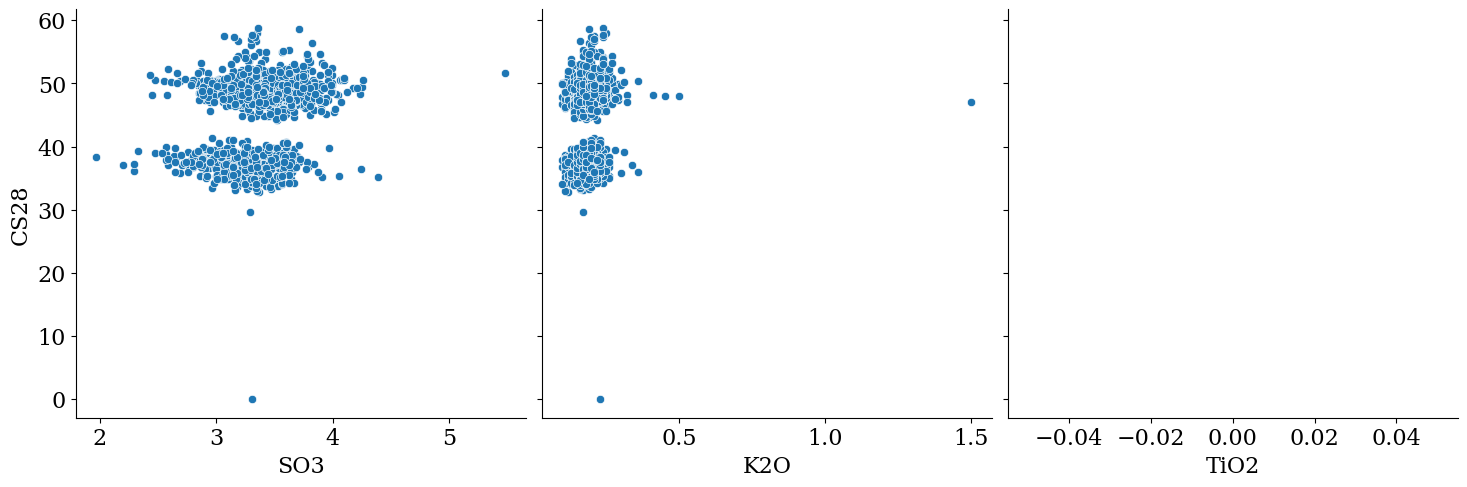

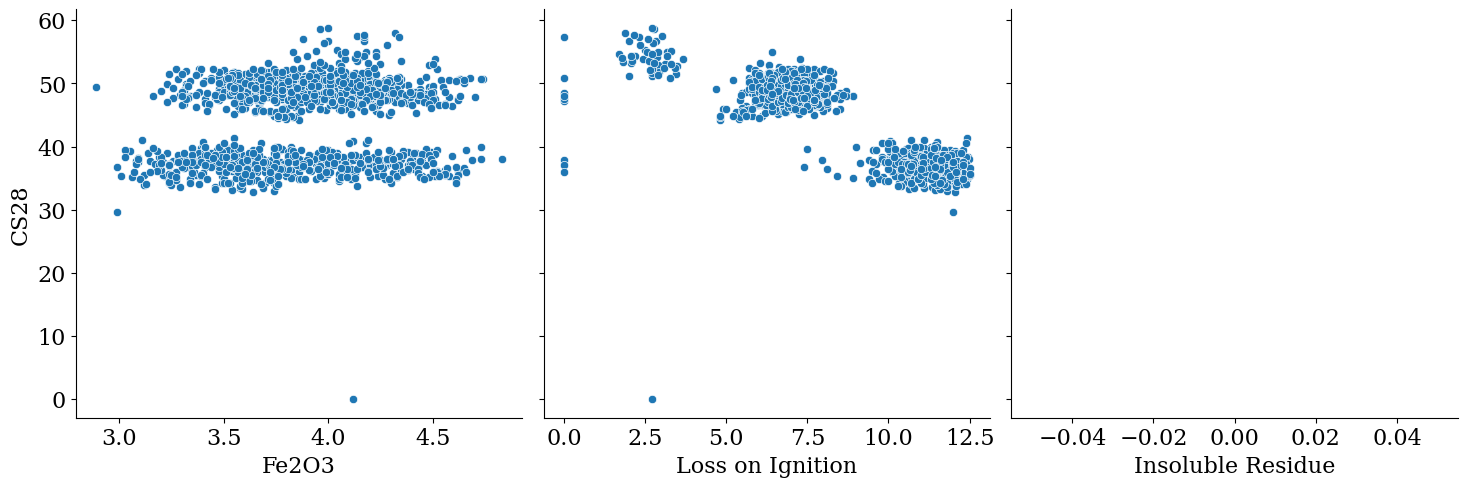

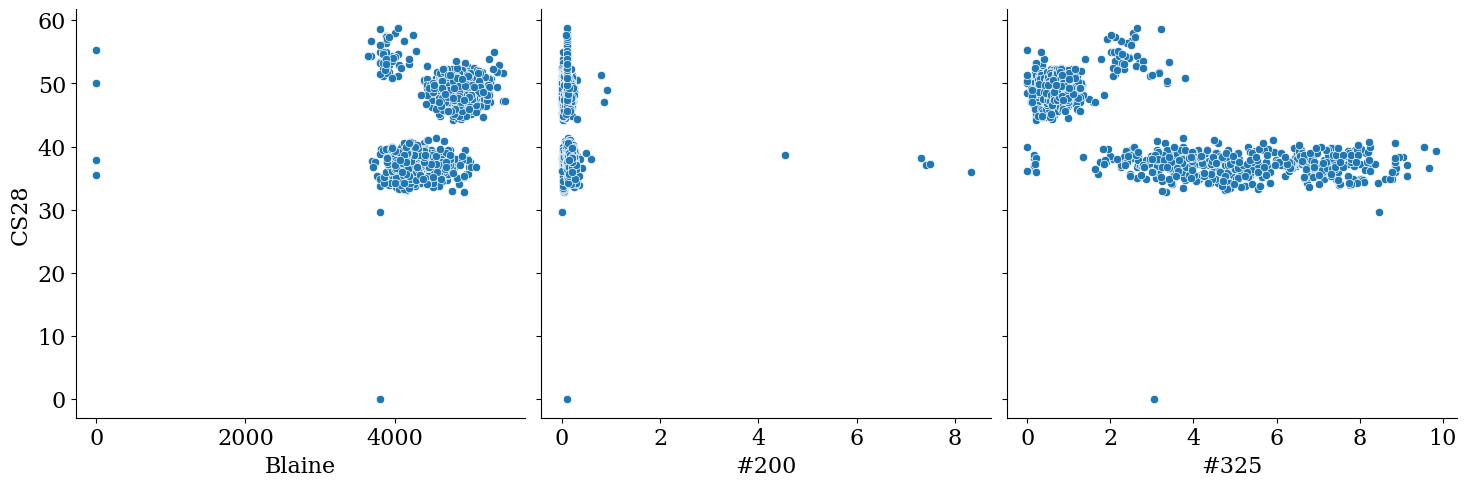

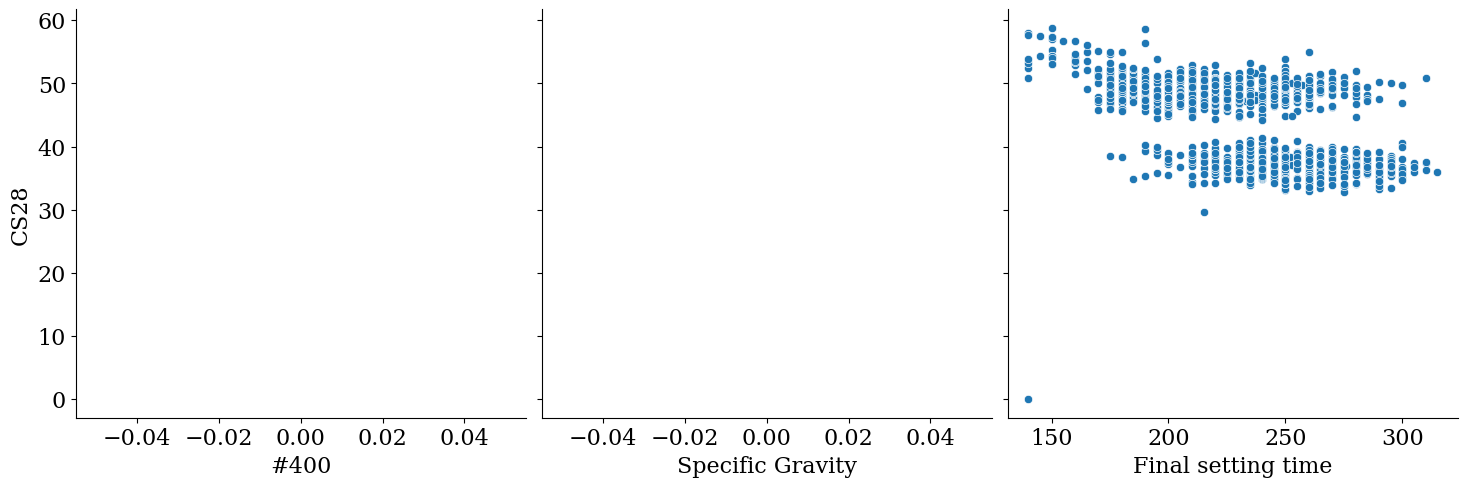

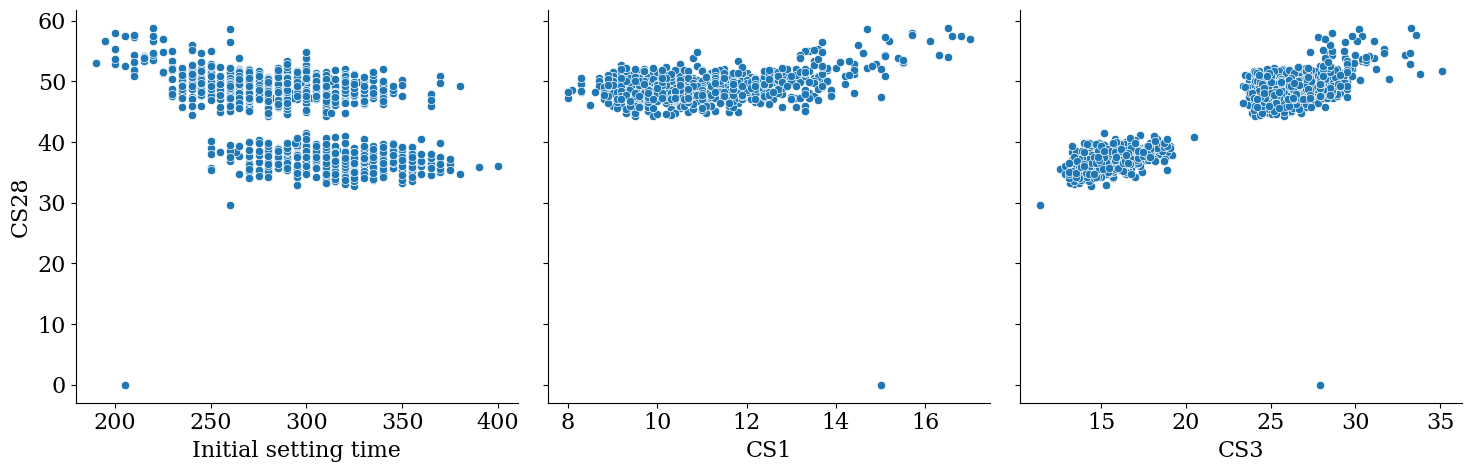

<IPython.core.display.Javascript object>

In [62]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [63]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

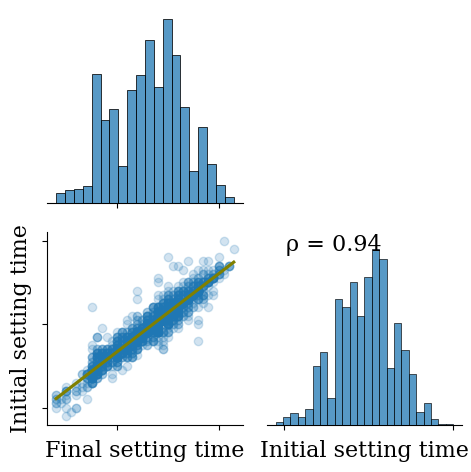

<IPython.core.display.Javascript object>

In [64]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [65]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

679 valid days out of 842


<IPython.core.display.Javascript object>

In [66]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [67]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6}}

<IPython.core.display.Javascript object>

In [68]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        24
      2        16
      3        21
      4        21
      5        22
      6        24
      7        23
      8        19
      9        21
      10       22
      11       19
      12       18
2021  1        21
      2        19
      3        23
      4        22
      5        21
      6        21
      7        24
      8        21
      9        22
      10       20
      11       17
      12       21
2022  1        18
      2        18
      3        21
      4        18
      5        18
      6        17
      7        19
      8        18
      9        21
      10       19
      11       20
      12       19
2023  1        21
      2        17
      3        19
      4        20
      5        21
      6        16
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

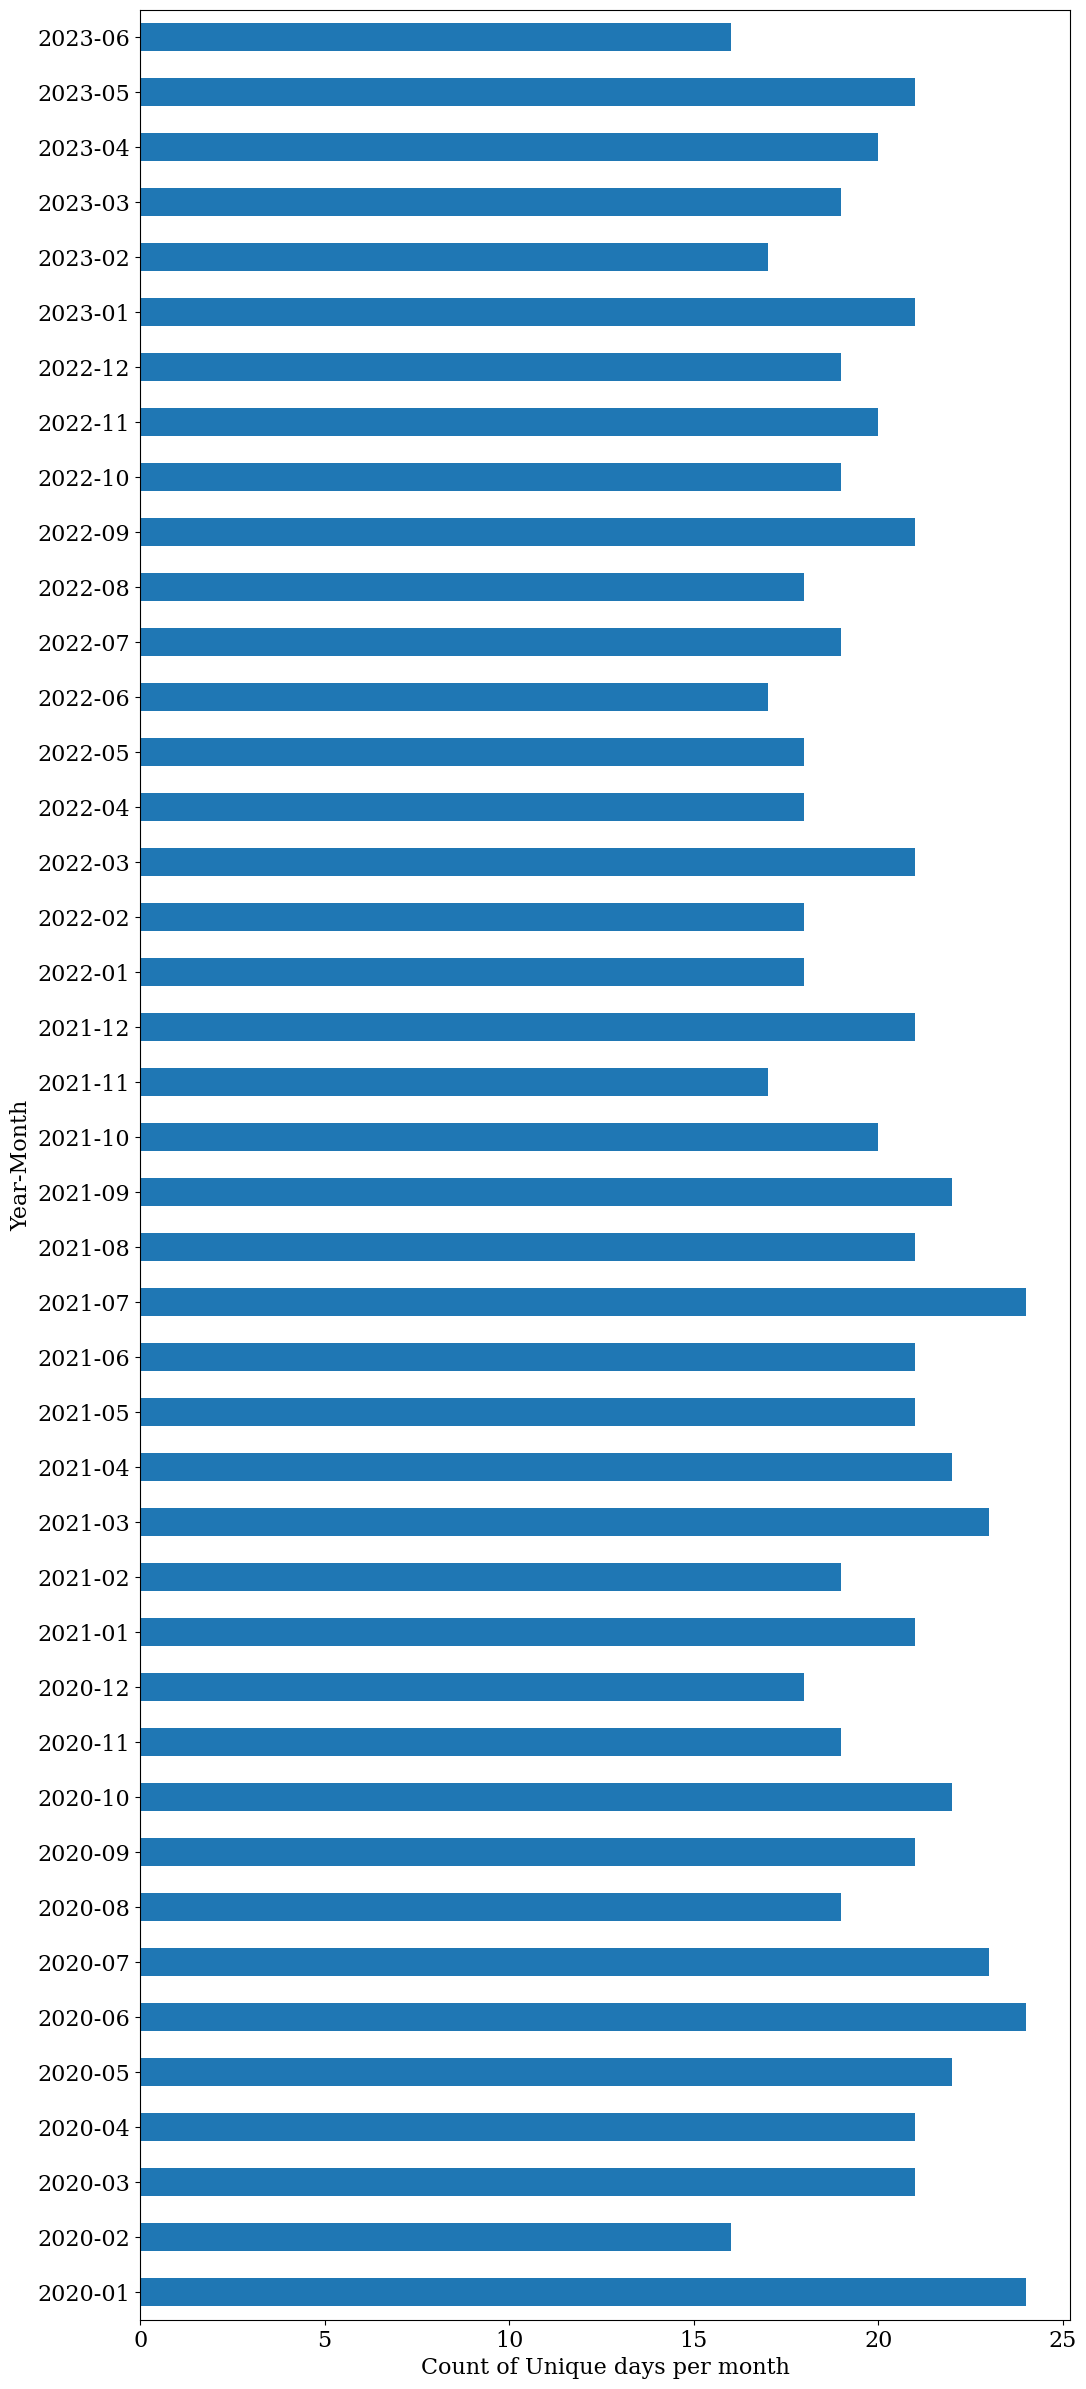

<IPython.core.display.Javascript object>

In [69]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [70]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        29
      2        19
      3        26
      4        32
      5        32
      6        33
      7        34
      8        32
      9        33
      10       31
      11       30
      12       29
2021  1        30
      2        29
      3        34
      4        32
      5        30
      6        31
      7        32
      8        35
      9        34
      10       33
      11       27
      12       28
2022  1        28
      2        26
      3        34
      4        31
      5        29
      6        29
      7        33
      8        31
      9        33
      10       33
      11       32
      12       32
2023  1        33
      2        27
      3        33
      4        44
      5        50
      6        43
Name: size, dtype: int64


<IPython.core.display.Javascript object>

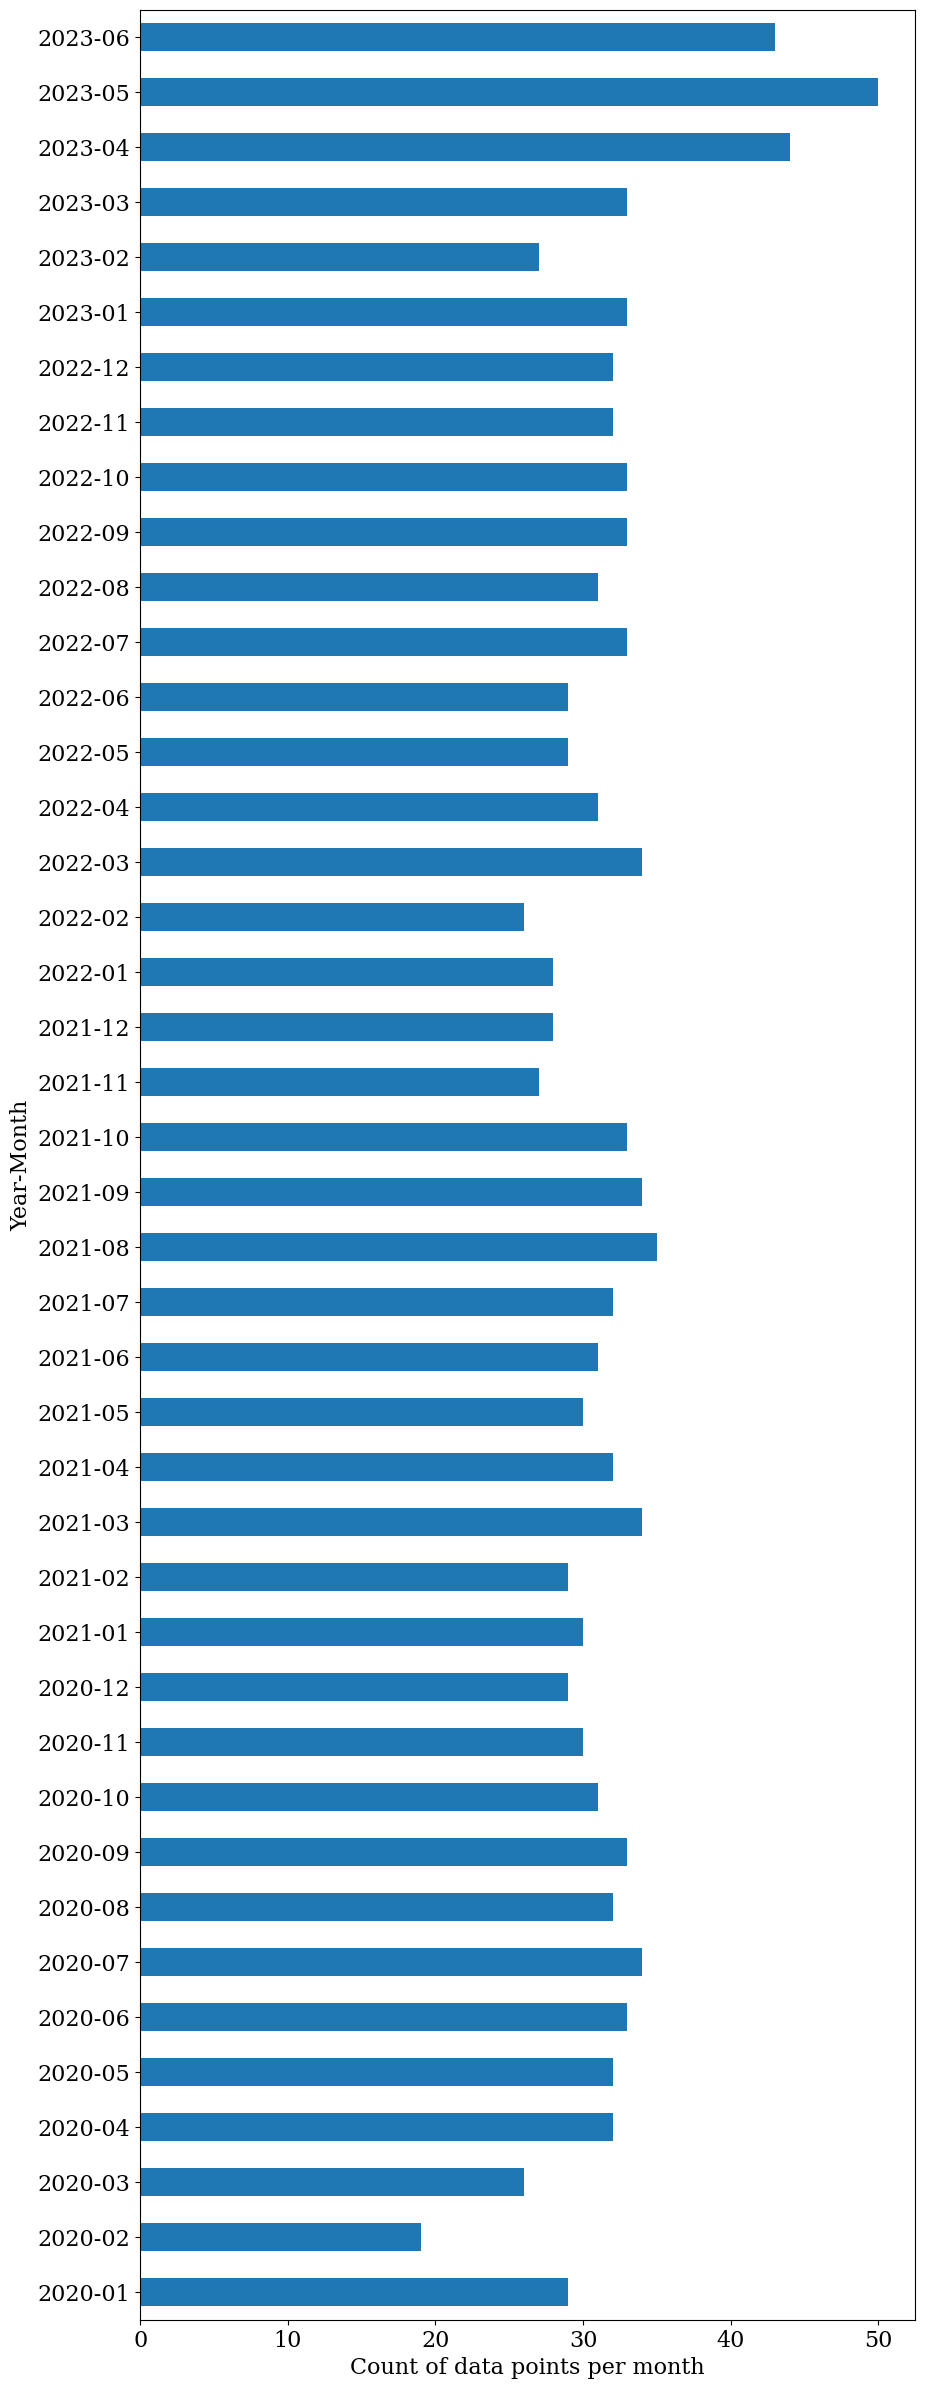

<IPython.core.display.Javascript object>

In [71]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [72]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2020-2 has the minimum number of days with samples - 19
2023-5 has the maximum number of days with samples - 50


<IPython.core.display.Javascript object>

In [73]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 30, 2021: 31, 2022: 30, 2023: 38}

Mean number of observations - all years
31


<IPython.core.display.Javascript object>

In [74]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  842.000000
mean     1.586698
std      0.579240
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000

<IPython.core.display.Javascript object>

In [75]:
day_counts[["DayCount"]].value_counts()

DayCount
2           416
1           387
3            39
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [76]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
226  2020     11   21         3
294  2021      3    9         3
420  2021      8   28         3
542  2022      3    8         3
575  2022      4   28         3
607  2022      6   23         3
775  2023      3   16         3
784  2023      3   30         3
785  2023      4    1         3
787  2023      4    4         3
789  2023      4    8         3
790  2023      4   11         3
792  2023      4   13         3
793  2023      4   15         3
795  2023      4   18         3
801  2023      4   25         3
803  2023      4   27         3
804  2023      4   29         3
805  2023      5    2         3
807  2023      5    4         3
808  2023      5    6         3
810  2023      5    9         3
812  2023      5   11         3
813  2023      5   13         3
817  2023      5   19         3
821  2023      5   25         3
822  2023      5   27         3
824  2023      5   30         3
826  2023      6    1         3
828  2023      6    5         3
829  2023      6    6         3
831  2023      6   10         3
833  2023      6   13         3
835  2023      6   17         3
837  2023      6   20         3
838  2023      6   22         3
839  2023      6   24         3
840  2023      6   27         3
841  2023      6   29         3

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

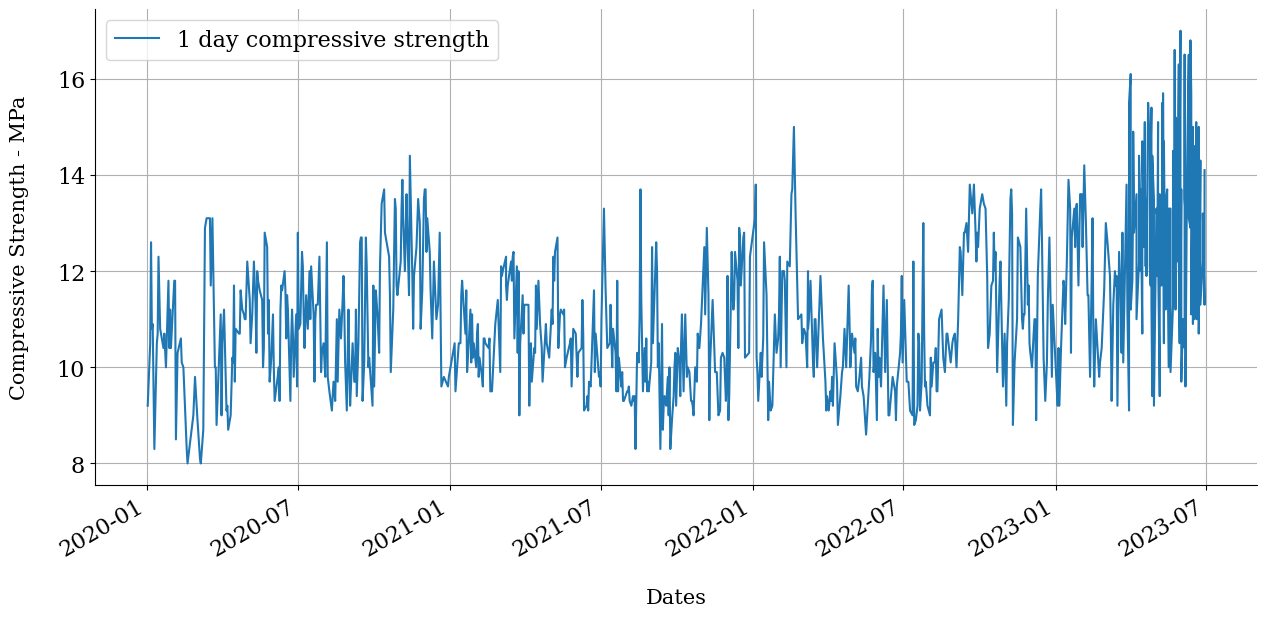

<IPython.core.display.Javascript object>

In [77]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

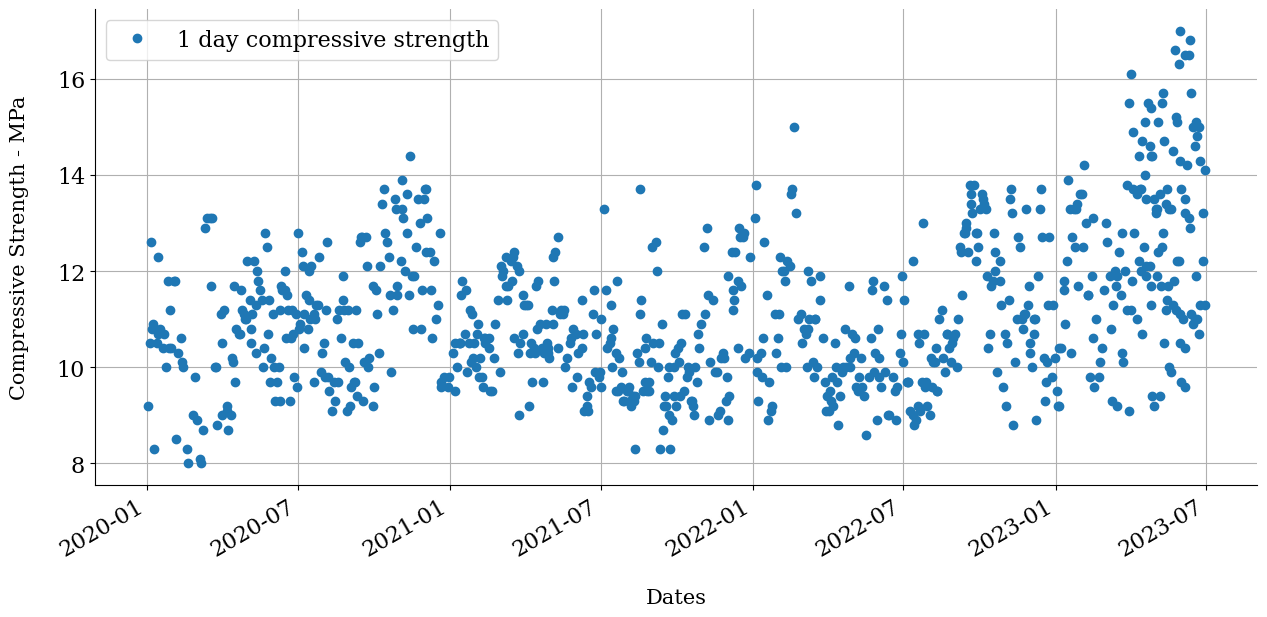

<IPython.core.display.Javascript object>

In [78]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

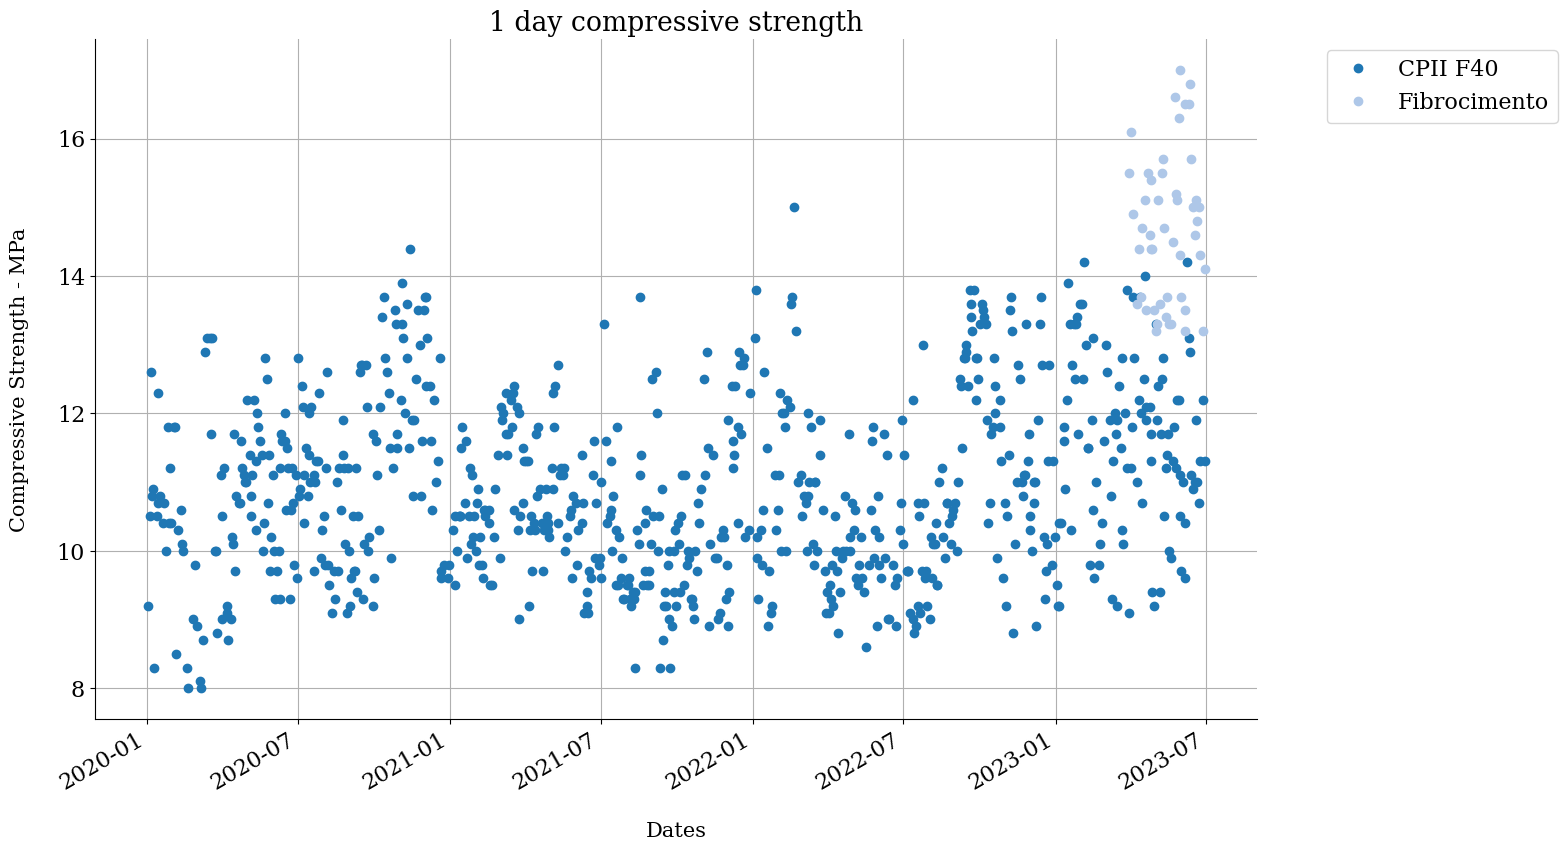

<IPython.core.display.Javascript object>

In [79]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

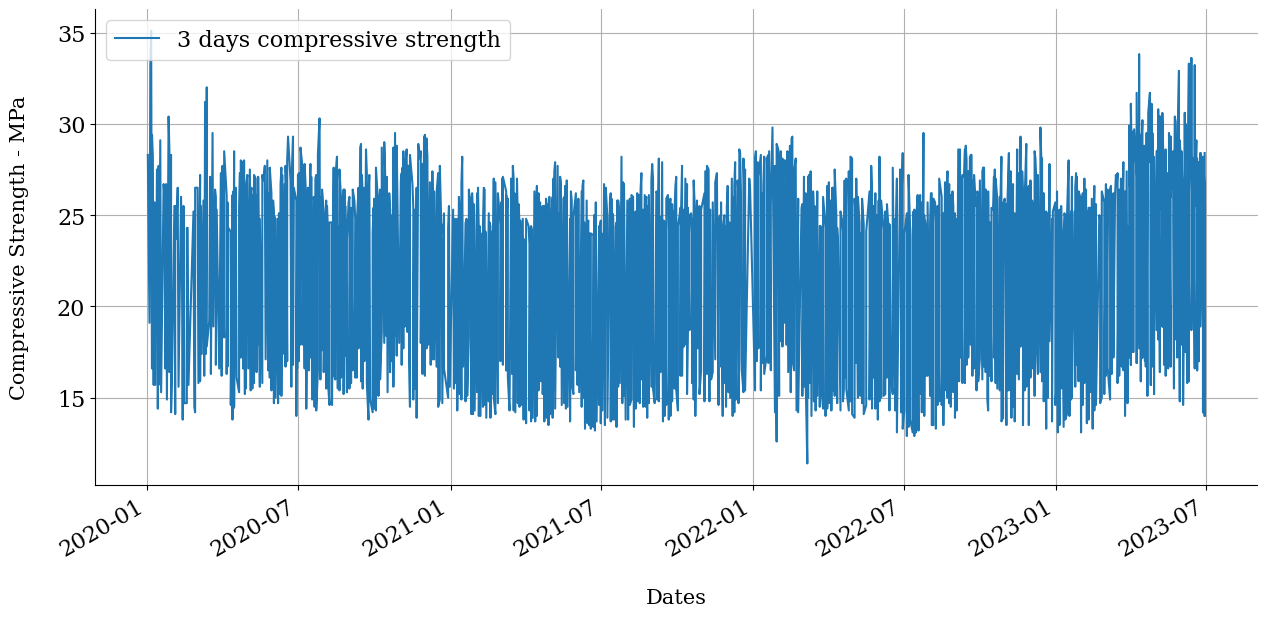

<IPython.core.display.Javascript object>

In [80]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

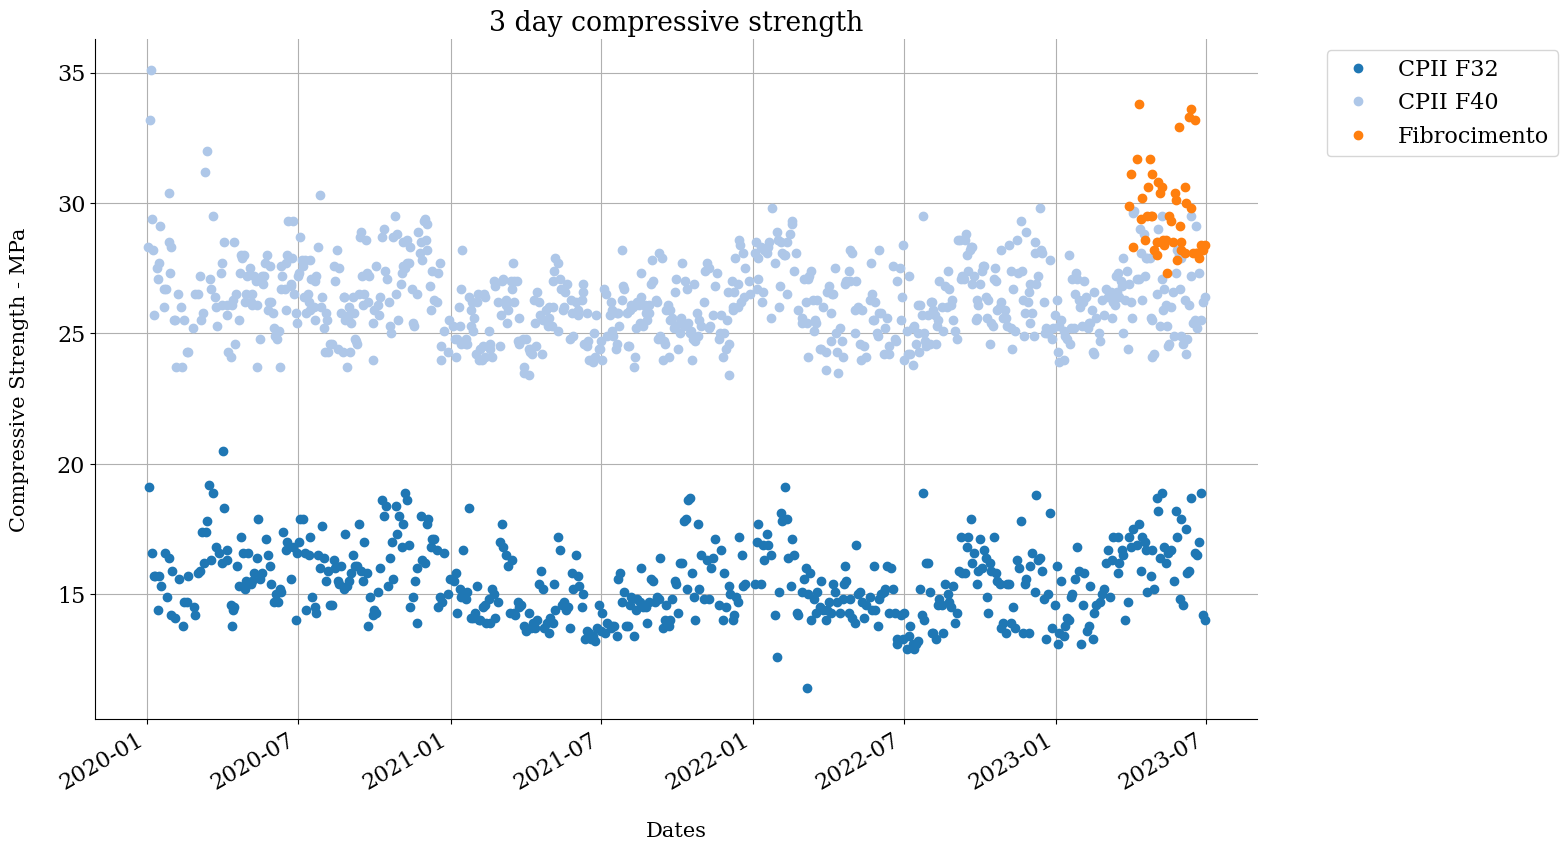

<IPython.core.display.Javascript object>

In [81]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

In [82]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

<IPython.core.display.Javascript object>

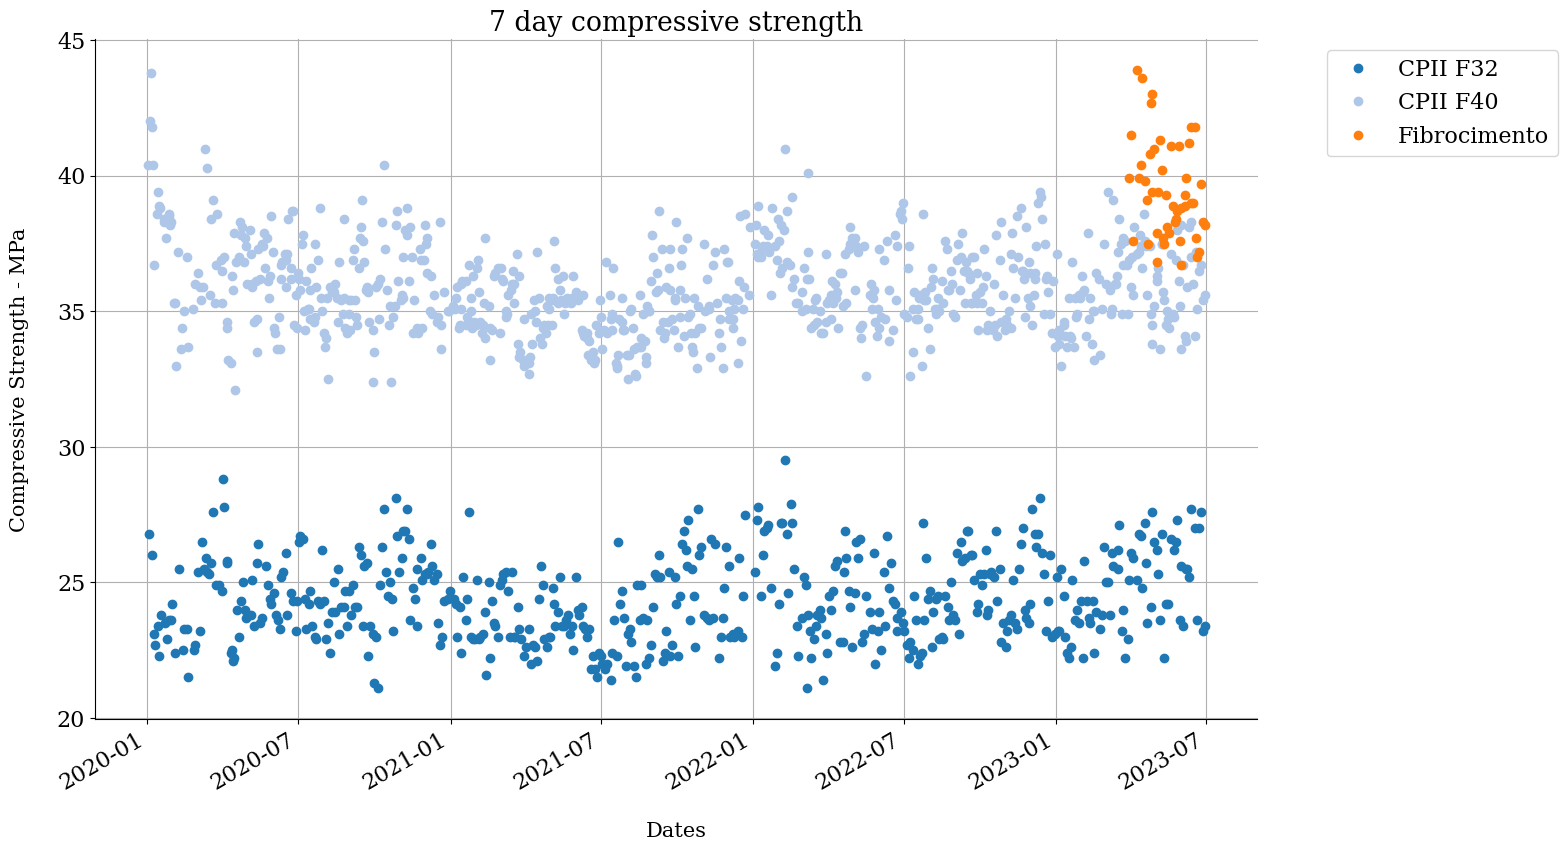

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

In [84]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

<IPython.core.display.Javascript object>

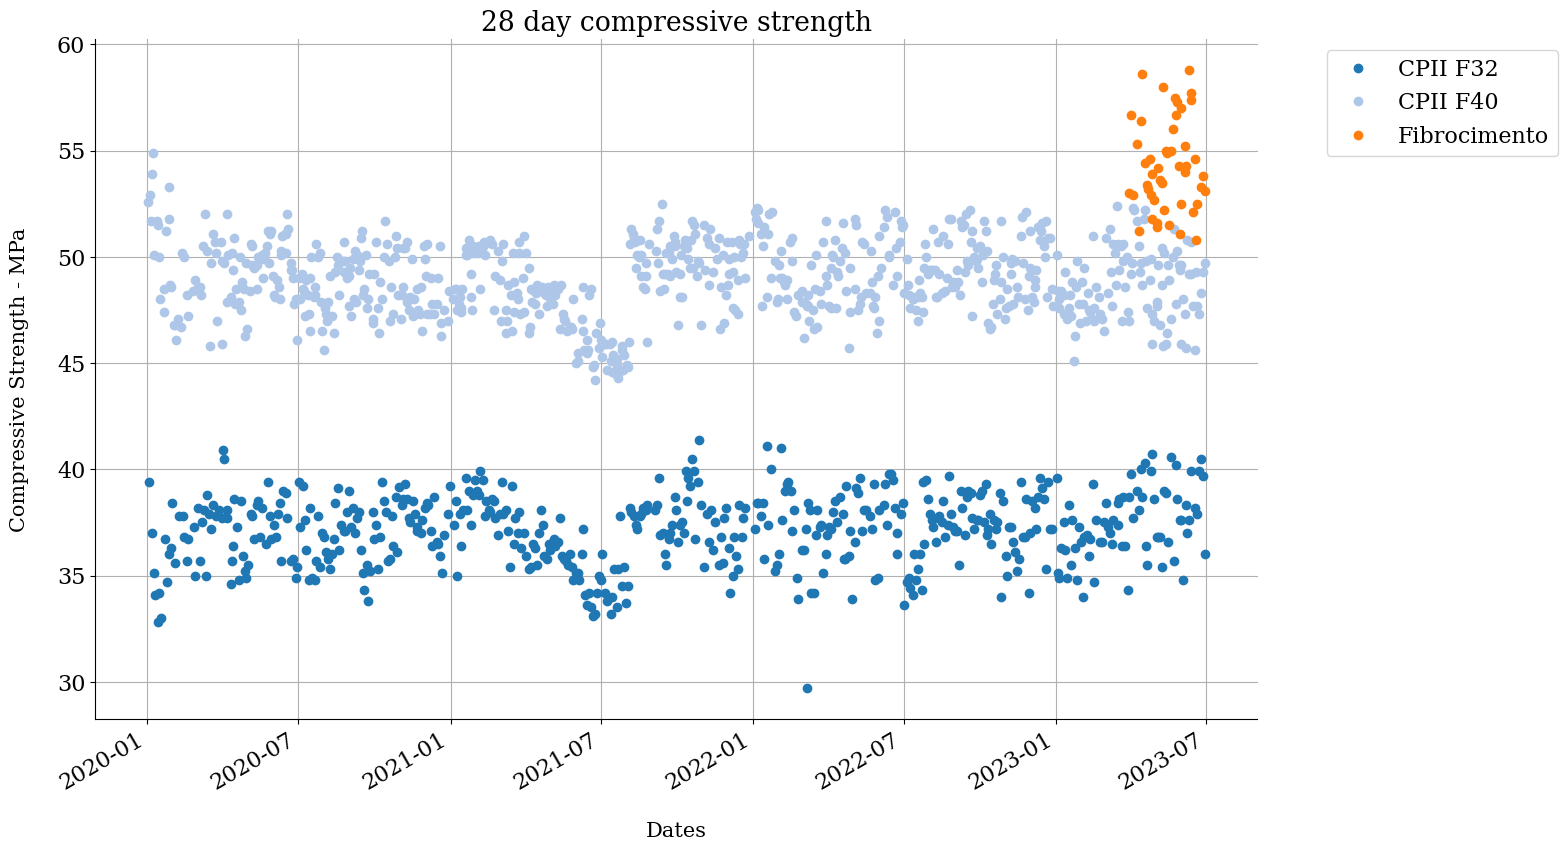

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()